# Lab Three: Association Rule Mining

Matt Farrow, Amber Clark, Blake Freeman, Megan Ball

## **2015 Flight Delays and Cancellations**
Data Source: [Kaggle](https://www.kaggle.com/usdot/flight-delays?select=flights.csv)

Our data set consists of over 5 million rows of flight information in the domestic United States for the year of 2015. In order to optimize our modeling time, we have narrowed the scope of our classification tasks to the Dallas area only (Dallas Love Field and DFW airports). 

## Rubric

### [Business Understanding](#Business-Understanding) (10 points total)

- [10 points] Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

### [Data Understanding](#Data-Understanding) (20 points total)

#### [Data Understanding 1](#Data-Understanding-1)

- [10 points] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?

#### [Data Understanding 2](#Data-Understanding-2)

- [10 points] Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.

### [Modeling and Evaluation](#Modeling-and-Evaluation) (50 points total)

Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results.

#### Option B: Association Rule Mining

- Train: Create frequent itemsets and association rules (adjust parameters).
- Eval: Use several measures for evaluating how interesting different rules are.
- Visualize: Use tables/visualization to discuss the found results.
- Summarize: Describe your results. What findings are the most compelling and why?

#### [Modeling and Evaluation 1](#Modeling-and-Evaluation-1)

- Train and adjust parameters

#### [Modeling and Evaluation 2](#Modeling-and-Evaluation-2)

- Evaluate and compare

#### [Modeling and Evaluation 3](#Modeling-and-Evaluation-3)

- Visualize results

#### [Modeling and Evaluation 4](#Modeling-and-Evaluation-4)

- Summarise the ramifications

### [Deployment](#Deployment) (10 points total)

Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?

- How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?
- How would your deploy your model for interested parties?
- What other data should be collected?
- How often would the model need to be updated, etc.?

### [Exceptional Work](#Exceptional-Work) (10 points total)

You have free reign to provide additional analyses or combine analyses.

# Business Understanding
Jump to [top](#Rubric)

The data set that our group selected came from the U.S. Department of Transportation’s Bureau of Transportation Statistics and “tracks the on-time performance of domestic flights operated by large air carriers” during 2015 (Kaggle). The data is broken up into three separate .csv files: one with flight details for 5,819,079 flights during 2015, one with 14 different U.S.-based airlines, and one with the geographic details of 322 U.S. airports.

From this data set we narrowed our scope to only include flights departing from the Dallas area (Dallas Love Field and Dallas-Fort Worth International Airport) - this is so we can present a more tangible result to our collective audiences, which is both the airlines and the consumers themselves.

We use clustering during our preprocessing in order to create buckets for several of the features. We then use  association rule mining to determine patterns in our data based on confidence and lift. Possible use cases include:

- Helping customers understand possible impacts based on destination, airline, and flight time
- Helping airlines better understand the impact of current conditions on their flights
- Using as a feature selection tool to determine important attributes for predictive modeling

Confidence measures how often the rule is true and lift measures how often the items occur together versus independently. We target a lift value greater than 1 to determine a 'good' rule because it tells us that the items co-occur more frequently than pure chance.

# Data Understanding
Jump to [top](#Rubric)

## Data Understanding 1
Jump to [top](#Rubric)

> Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?

In [1]:
# # Uncomment to install packages if needed
# install.packages("ggpubr")
# install.packages("GGally")
# install.packages("tidyverse", dependencies = TRUE, INSTALL_opts = '--no-lock')
# install.packages("lubridate", dependencies = TRUE, INSTALL_opts = '--no-lock')
# install.packages("here", dependencies = TRUE, INSTALL_opts = '--no-lock')
# install.packages("janitor", dependencies = TRUE, INSTALL_opts = '--no-lock')
# install.packages("arules", dependencies = TRUE, INSTALL_opts = '--no-lock')
# install.packages("arulesViz", dependencies = TRUE, INSTALL_opts = '--no-lock')
# install.packages("cluster")
# install.packages("plotly")
# install.packages("memisc")
# install.packages("RColorBrewer")

In [2]:
# Uncomment options when done to get rid of nuisance warnings
options(warn=-1)
library(ggpubr)
library(ggplot2)
library(GGally)
library(memisc)
library(lubridate)
library(here)
library(janitor)
library(arules)
library(arulesViz)
library(cluster)
library(scales)
library(tidyverse)
library(plotly)
library(RColorBrewer)

Loading required package: ggplot2
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Loading required package: lattice
Loading required package: MASS

Attaching package: ‘memisc’

The following object is masked from ‘package:ggplot2’:

    syms

The following objects are masked from ‘package:stats’:

    contr.sum, contr.treatment, contrasts

The following object is masked from ‘package:base’:

    as.array


Attaching package: ‘lubridate’

The following object is masked from ‘package:memisc’:

    is.interval

The following object is masked from ‘package:base’:

    date

here() starts at /Users/mattfarrow/Documents/GitHub/7331-machine-learning-1

Attaching package: ‘here’

The following object is masked from ‘package:lubridate’:

    here


Attaching package: ‘janitor’

The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test

Loading required package: Matrix

Attaching package: ‘arules’

The following object is masked from ‘pac

In [3]:
# Read in the data directly
airlines <- read_csv(here("Data", "airlines.csv"))
airports <- read_csv(here("Data", "airports.csv"))
flights  <- read_csv(here("Data", "flights.csv"))

# Read in the data directly from GitHub
# airlines <- read_csv('https://raw.githubusercontent.com/mattfarrow1/7331-machine-learning-1/main/Data/airlines.csv')
# airports <- read_csv('https://raw.githubusercontent.com/mattfarrow1/7331-machine-learning-1/main/Data/airports.csv')
# flights  <- read_csv('https://media.githubusercontent.com/media/mattfarrow1/7331-machine-learning-1/main/Data/flights.csv')

# Clean up column names
airlines <- airlines %>% 
  clean_names() %>% 
  rename(airline_code = iata_code)
airports <- clean_names(airports)
df <- flights %>% 
  clean_names() %>% 
  rename(airline_code = airline)

# Merge data together
df <- left_join(df, airlines, by ="airline_code")

# Subset to DFW Area
df <- df %>% filter(origin_airport == "DFW" | origin_airport == "DAL")

Parsed with column specification:
cols(
  IATA_CODE = col_character(),
  AIRLINE = col_character()
)
Parsed with column specification:
cols(
  IATA_CODE = col_character(),
  AIRPORT = col_character(),
  CITY = col_character(),
  STATE = col_character(),
  COUNTRY = col_character(),
  LATITUDE = col_double(),
  LONGITUDE = col_double()
)
Parsed with column specification:
cols(
  .default = col_double(),
  AIRLINE = col_character(),
  TAIL_NUMBER = col_character(),
  ORIGIN_AIRPORT = col_character(),
  DESTINATION_AIRPORT = col_character(),
  SCHEDULED_DEPARTURE = col_character(),
  DEPARTURE_TIME = col_character(),
  WHEELS_OFF = col_character(),
  WHEELS_ON = col_character(),
  SCHEDULED_ARRIVAL = col_character(),
  ARRIVAL_TIME = col_character(),
  CANCELLATION_REASON = col_character()
)
See spec(...) for full column specifications.


This code is the same as labs 1 & 2 as well as the mini lab, but in R instead of Python.

### Process Dates & Time

In [4]:
# Combine the Year, Month & Day columns into a single flight date
df$flight_date <- as.Date(with(df, paste(df$year, df$month, df$day, sep="-"), "%Y-%m-%d"))

# Define the scheduled departure and arrival datetimes
df$scheduled_departure_dt <-
  parse_date_time(paste(
    df$year,
    df$month,
    df$day,
    df$scheduled_departure,
    sep = "-"
  ),
  "%Y-%m-%d-%H%M")

df$scheduled_arrival_dt <-
  parse_date_time(paste(
    df$year,
    df$month,
    df$day,
    df$scheduled_arrival,
    sep = "-"
  ),
  "%Y-%m-%d-%H%M")

In order to match up flight and weather information more closely than simply by date, we created two new variables - `scheduled_departure_dt` & `scheduled_arrival_dt` that combine the flight date with the respective flight time. 

### Append Dallas-Area Weather

In [5]:
# Read in the data
weather <- read_csv(here("Data", "dfw_weather.csv"))

# Create a datetime column, rounded to the nearest 30 minutes
weather$date_time <- readr::parse_datetime(weather$dt_iso,
                                           format = "%Y-%m-%d %H:%M:%S %z %Z")

# Drop unnecessary columns
weather <- weather %>%
  select(
    -c(
      dt,
      dt_iso,
      timezone,
      city_name,
      lat,
      lon,
      feels_like,
      temp_min,
      temp_max,
      sea_level,
      grnd_level,
      weather_icon,
      weather_description
    )
  )

# Filter weather to only 2015
weather <- weather %>% 
  filter(year(date_time) == 2015)

# Round the scheduled departure datetime to the nearest hour
df$scheduled_departure_dt <- round_date(df$scheduled_departure_dt, "1 hour")

# Join df & weather data
df <- left_join(df, weather, by = c("scheduled_departure_dt" = "date_time"))

Parsed with column specification:
cols(
  .default = col_double(),
  dt_iso = col_character(),
  city_name = col_character(),
  sea_level = col_logical(),
  grnd_level = col_logical(),
  weather_main = col_character(),
  weather_description = col_character(),
  weather_icon = col_character()
)
See spec(...) for full column specifications.


Before joining the weather data from [OpenWeather](https://openweathermap.org/), we dropped features that we did not feel lent themselves to our analysis. 

- `dt` and `df_iso` were superceded by the new feature `date_time` which was parsed ot match the flight data
- `timezone`. `city_name`, `lat`, `lon`, `sea_level`, and `grnd_level` are all features that were the same for all observations since we subset our data to the DFW market
- `feels_like` is not a feature that would impact flight delays or cancellations
- `weather_icon` and `weather_description` offer extraneous information that is already contained in other features

### Missing Values

The work done to process missing values is the same as the work done in labs 1 & 2 as well as the mini-lab. The notable exception is the fact that in this lab we are creating a single data set to use with clustering and association rule mining, where the previous labs had slightly different processes to create a delay data set as well as a cancellation data set. 

`cancellation_reason`

- We replaced null values with “N” if the flight was not cancelled. This was done to allow the variable to be re-coded as a factor

`departure_time`

- We converted this to a binary value `departed` defined on if this was a missing value or not

`air_system_delay`, `security_delay`, `airline_delay`, `late_aircraft_delay`, `weather_delay`, `rain_1h`, `rain_3h`, `snow_1h`, `snow_3h`

- We replaced the null values with 0 – as this would indicate there was no value appropriate for these metrics

`departure_delay`, `taxi_out`,  `elapsed_time`, `air_time`, `taxi_in`, `arrival_delay`

- For these attributes we only inserted zeros if the flight was cancelled. We did this since if it was not canceled this was a error and needed to be removed

After the initial pass only `elapsed_time`, `air_time`, `taxi_in`, `arrival_delay` and `delayed_on_arrival` had missing values. At this point, it was appropriate to drop the remaining rows with missing values since they were clearly not representative of our data set.

In [6]:
# Remove non-critical columns WHEELS_ON and WHEELS_OFF
df <- df %>% select(-c(wheels_on,
                      wheels_off))

# Missing value check
tibble(variable = names(colSums(is.na(df))),
       missing = colSums(is.na(df)))

variable,missing
year,0
month,0
day,0
day_of_week,0
airline_code,0
flight_number,0
tail_number,832
origin_airport,0
destination_airport,0
scheduled_departure,0


In [7]:
# Convert times to numeric for clustering later on
df$scheduled_departure <- as.numeric(df$scheduled_departure)
df$scheduled_arrival <- as.numeric(df$scheduled_arrival)

# Replace missing values in cancellation_reason with "N" and departure_time with "0"
df <- df %>% replace_na(list(cancellation_reason = 'N',
                        departure_time = 0))

# Convert departure_time to a binary value - departed
df <- df %>% 
  mutate(departure_time = replace(departure_time, departure_time != 0, 1)) %>%
  rename(departed = departure_time)

# Convert arrival_time to a binary value - arrived
df <- df %>% 
  rename(arrived = arrival_time) %>% 
  mutate(arrived = if_else(!is.na(arrived), 1, 0)) 

# Fill missing values with 0
df <- df %>% replace_na(list(air_system_delay = 0, 
                             security_delay = 0,
                             airline_delay = 0,
                             late_aircraft_delay = 0,
                             weather_delay = 0,
                             rain_1h = 0,
                             rain_3h = 0,
                             snow_1h = 0,
                             snow_3h = 0))

# Change remaining null values to 0 if flight was cancelled
df <- df %>%
   mutate(departure_delay = replace(departure_delay, cancelled == 1, 0),
          taxi_out = replace(taxi_out, cancelled == 1, 0),
          elapsed_time = replace(elapsed_time, cancelled == 1, 0),
          air_time = replace(air_time, cancelled == 1, 0),
          taxi_in = replace(taxi_in, cancelled == 1, 0),
          arrival_delay = replace(arrival_delay, cancelled == 1, 0))

# Create a new column where the arrival_delay > 0 means it's delayed(=1) and if <= 0 it's not delayed(=0)
df <- df %>% 
  mutate(delayed_on_arrival = if_else(arrival_delay > 0, "Yes", "No")) %>%
  mutate(delayed_on_depart = if_else(departure_delay > 0, "Yes", "No"))

# Missing value check
tibble(variable = names(colSums(is.na(df))),
       missing = colSums(is.na(df)))

variable,missing
year,0
month,0
day,0
day_of_week,0
airline_code,0
flight_number,0
tail_number,832
origin_airport,0
destination_airport,0
scheduled_departure,0


In [8]:
# Drop remaining missing values
df <- drop_na(df)

# Delete date columns ahead of modeling
df <- df %>% select(-c(flight_date,
                       scheduled_departure_dt,
                       scheduled_arrival_dt))

# Remove flights to save RAM
rm(flights)

### Types of Variables

In the data type summary below, we can see the remaining variables are a mix of numeric doubles and character variables. We will keep them in this format for the purposes of visualizations, but ultimately we will need to change all variables to a factor in order to run association rule mining.

In [9]:
t(Sapply(df[1,], typeof))

,1
year,double
month,double
day,double
day_of_week,double
airline_code,character
flight_number,double
tail_number,character
origin_airport,character
destination_airport,character
scheduled_departure,double


### Data Summary

Below is the summary of all our variables along with key summary statistics. Our numeric variables are later removed or converted to factors in the next section for association rule mining.

In [10]:
summary(df)

      year          month             day         day_of_week   
 Min.   :2015   Min.   : 1.000   Min.   : 1.00   Min.   :1.000  
 1st Qu.:2015   1st Qu.: 3.000   1st Qu.: 8.00   1st Qu.:2.000  
 Median :2015   Median : 6.000   Median :16.00   Median :4.000  
 Mean   :2015   Mean   : 6.025   Mean   :15.57   Mean   :3.943  
 3rd Qu.:2015   3rd Qu.: 9.000   3rd Qu.:23.00   3rd Qu.:6.000  
 Max.   :2015   Max.   :12.000   Max.   :31.00   Max.   :7.000  
 airline_code       flight_number  tail_number        origin_airport    
 Length:320977      Min.   :   1   Length:320977      Length:320977     
 Class :character   1st Qu.: 985   Class :character   Class :character  
 Mode  :character   Median :1710   Mode  :character   Mode  :character  
                    Mean   :1909                                        
                    3rd Qu.:2771                                        
                    Max.   :6899                                        
 destination_airport scheduled_dep

### Duplicated Data

From prior analysis, there was no duplicated data in our data set.

### Outliers

We know from prior analysis we have outliers in some of our variables, specifically the time related ones. However, we want to discover unique rule sets with our data and do not want to remove outliers in case they lead to an interesting rule. There is no negative impact to keeping them in our data in terms of our results and metrics.

## Data Understanding 2
Jump to [top](#Rubric)

> Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.

## Correlation Plot

While we don't need to worry about correlation in association rule mining, we thought it would be interesting to see where correlations might exist. Our data is not in its final form for association rule mining, since it must be numeric for correlation plots, but this may be useful for our rule mining later for specific pairs to avoid.

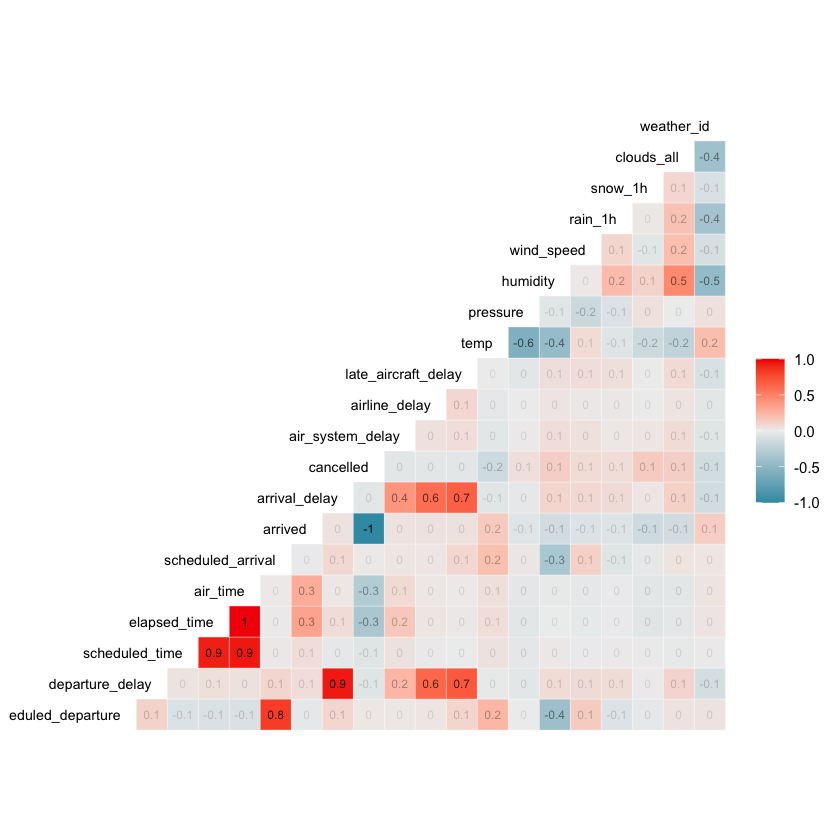

In [11]:
#here we removed tail_number, flight_number and destination_airport because the volume of options overwhelmed ggcorr. 
#In addition, we removed any nonnumeric variables or ones we did not note as highly correlated
du2corr <- df %>% 
    select(-c('tail_number','flight_number','destination_airport','airline_code','origin_airport',
              'departed','cancellation_reason','airline','weather_main','delayed_on_arrival',
              'delayed_on_depart', 'diverted', 'year', 'month', 'day', 'day_of_week', 'weather_delay',
              'wind_deg', 'security_delay', 'taxi_in', 'taxi_out', 'distance', 'rain_3h', 'snow_3h'))

ggcorr(du2corr, 
       hjust = 1, 
       layout.exp = 3,
       size = 3,
       label = TRUE,
       label_size = 2.5,
       label_alpha = TRUE)


In the correlation plot above, we see the area with strongest correlations are for `elapsed_time` and `scheduled_time`. Additionally, `scheduled_departure` is highly correlated with `scheduled_arrival` and `departure_delay` is highly correlated with `arrival_delay`. `elapsed_time`, and `scheduled_time` are numeric and will not be in our final data set. We are going to bucket the `scheduled_departure` and `scheduled_arrival` times, so we make note of their correlation for later.

## Cancellation Reasons

For the plot below, we take a look at cancellation reasons.  The value `N` means the flight was not cancelled.  The value `A` means the flight was cancelled due to the airline or carrier.  The value `B` means the flights were cancelled for weather related reasons.  The value `C` means the flight was cancelled due to air traffic control.

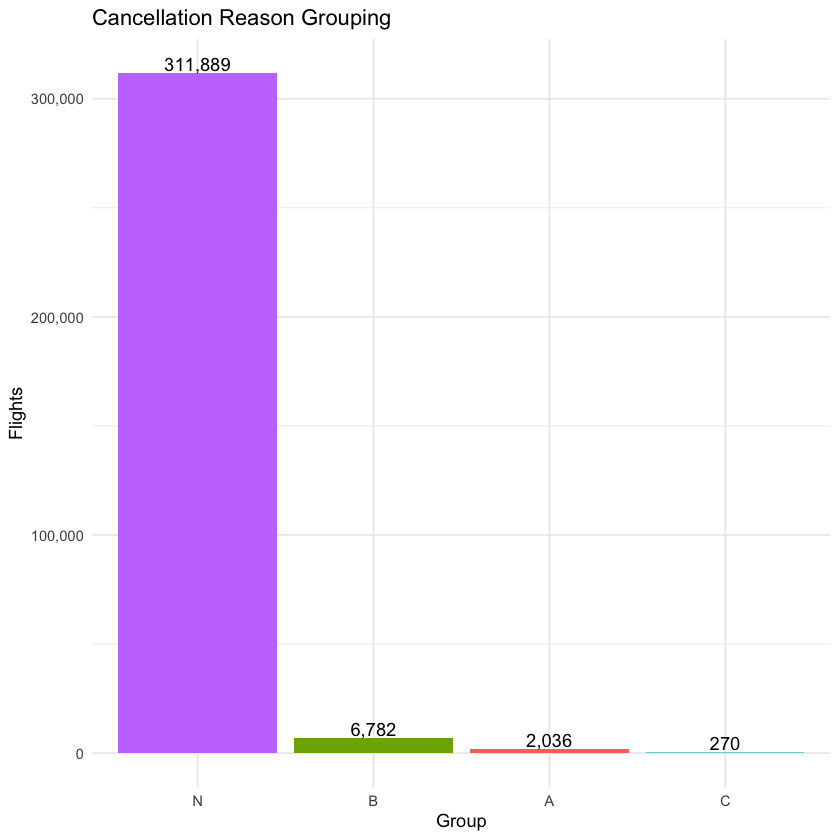

In [12]:
#cancellation reason
df %>% 
    count(cancellation_reason) %>% 
    arrange(desc(n)) %>% 
    ggplot(
        aes(reorder(cancellation_reason, desc(n)), n, fill = cancellation_reason, label = comma(n))) + 
        geom_col() +
        geom_text(vjust = -0.2) +
        labs(title = "Cancellation Reason Grouping",
           x = "Group",
           y = "Flights") +
        scale_y_continuous(label = comma) +
        theme_minimal() +
        theme(legend.position = "None")

As we can see, non-cancelled flights make up the vast majority of flights in our data. In order to better visualize cancellation reasons, we drop non-cancelled flights. 

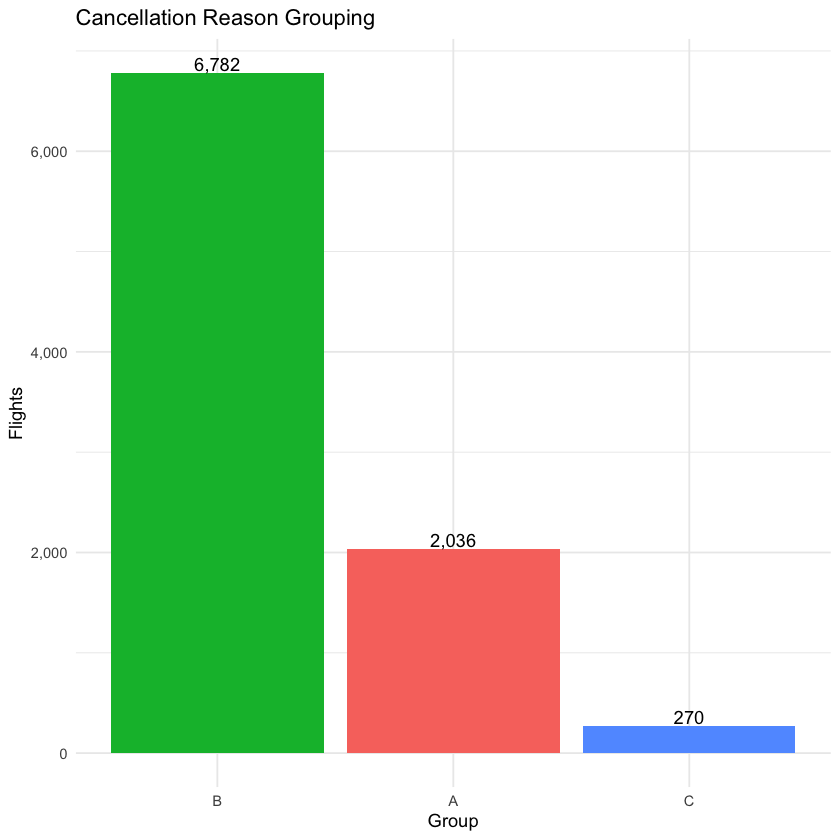

In [13]:
#removing the 'N' group to better visualize the other groups
df %>%
    filter(cancellation_reason != 'N') %>%
    count(cancellation_reason) %>% 
    arrange(desc(n)) %>% 
    ggplot(
        aes(reorder(cancellation_reason, desc(n)), n, fill = cancellation_reason, label = comma(n))) + 
        geom_col() +
        geom_text(vjust = -0.2) +
        labs(title = "Cancellation Reason Grouping",
           x = "Group",
           y = "Flights") +
        scale_y_continuous(label = comma) +
        theme_minimal() +
        theme(legend.position = "None")

Here we get a better sense of why flights were cancelled. There were close to 7,000 weather-related cancellations, approximately 2,000 carrier cancellations, and only a few hundred flights cancelled by air traffic control.

### Most Popular Destinations from Dallas

In the plot below, we can see that the most frequent destination airports were:

- Hartsfield–Jackson Atlanta International Airport (**ATL**)
- Los Angeles International Airport (**LAX**)
- Austin–Bergstrom International Airport (**AUS**)
- Chicago O'Hare International Airport (**ORD**)
- William P. Hobby Airport (**HOU**)
- San Antonio International Airport (**SAT**)
- Denver International Airport (**DEN**)
- New York LaGuardia (**LGA**)
- San Francisco International Airport (**SFO**)
- Las Vegas McCarran International (**LAS**)

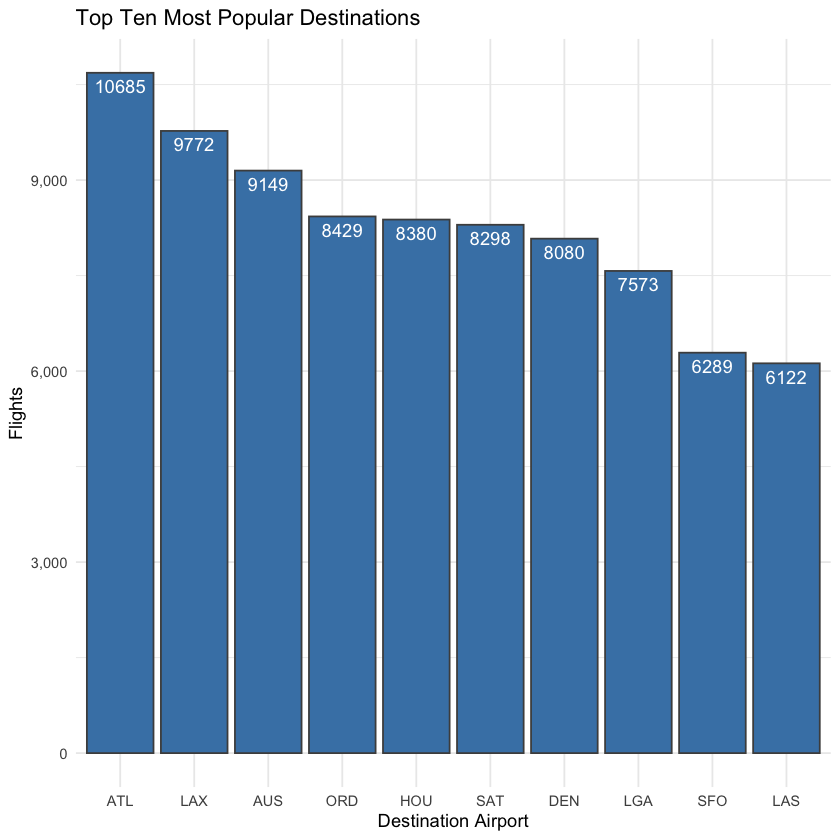

In [14]:
#do top 10 most popular
df %>% 
    count(destination_airport) %>% 
    arrange(desc(n)) %>% 
    slice_head(n=10) %>% 
    ggplot(
        aes(reorder(destination_airport, desc(n)), n, label = n)) + 
        geom_col(fill = "steelblue", color = "gray30") +
        geom_text(vjust = 1.5, color = "white") +
        labs(title = "Top Ten Most Popular Destinations",
           x = "Destination Airport",
           y = "Flights") +
        scale_y_continuous(label = comma) +
        theme_minimal()

### Weather Conditions for Flights from DAL and DFW Aiport

The top four weather conditions reported for flights from DAL and DFW were clouds, clear, mist and rain, with clouds being the overwhelming majority at over 200,000. The other weather conditions were much less frequent.

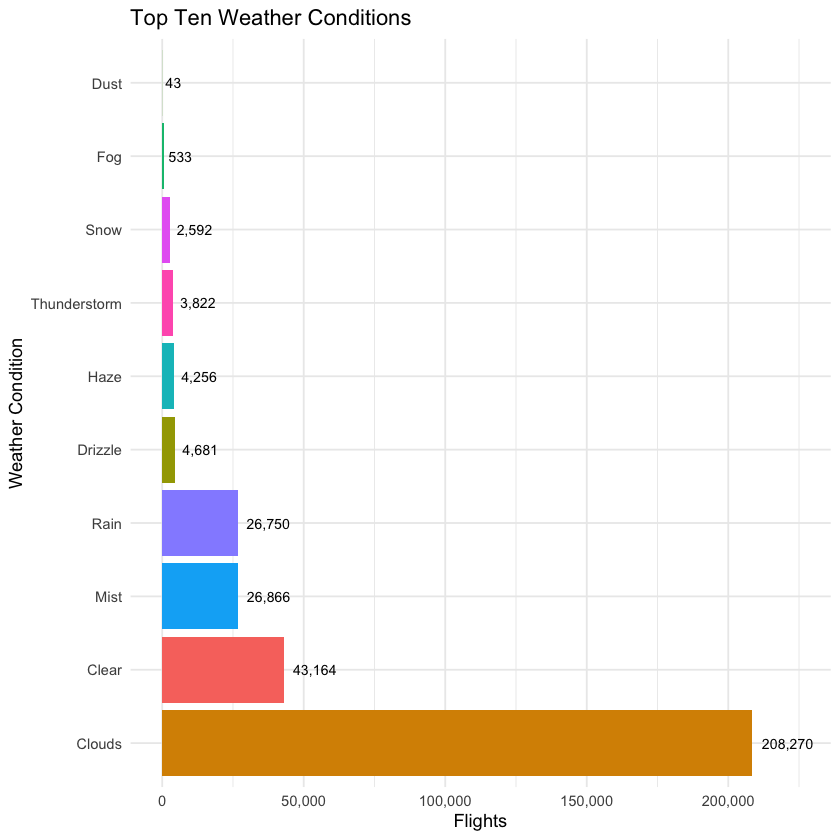

In [15]:
df %>% 
    count(weather_main) %>% 
    arrange(desc(n)) %>% 
    ggplot(
        aes(reorder(weather_main, desc(n)), n, fill = weather_main, label = comma(n))) + 
        geom_col() +
        geom_text(hjust = -0.2, size = 3) + 
        labs(title = "Top Ten Weather Conditions",
           x = "Weather Condition",
           y = "Flights") +
        scale_y_continuous(label = comma, limits = c(0, 225000)) +
        coord_flip() +
        theme_minimal() +
        theme(legend.position = "None")

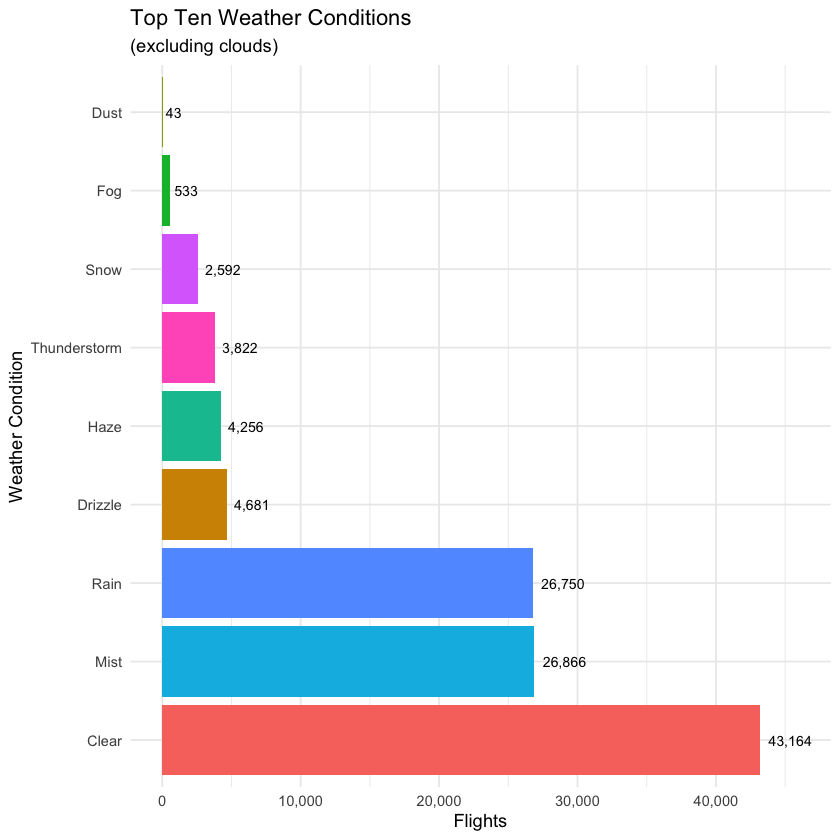

In [16]:
# Top conditions after removing clouds
df %>% 
    filter(weather_main != 'Clouds') %>%
    count(weather_main) %>% 
    arrange(desc(n)) %>% 
    ggplot(
        aes(reorder(weather_main, desc(n)), n, fill = weather_main, label = comma(n))) + 
        geom_col() +
        geom_text(hjust = -0.2, size = 3) + 
        labs(title = "Top Ten Weather Conditions",
             subtitle = "(excluding clouds)",
             x = "Weather Condition",
             y = "Flights") +
        scale_y_continuous(label = comma, limits = c(0, 46000)) +
        coord_flip() +
        theme_minimal() +
        theme(legend.position = "None")

It is interesting to note that there appear to be a similar number of flights taking place in mist as there are in rain. Likewise, drizzle, haze, and thunderstorms were also seen a similar number of times. 

### Destination Airport Cancellations

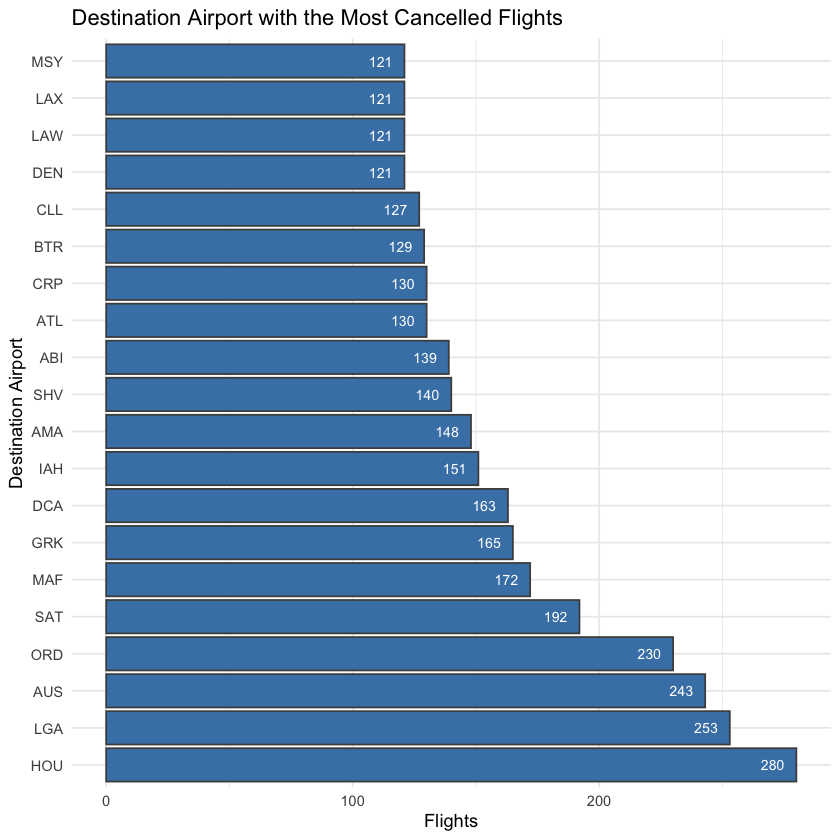

In [17]:
# Summarize the top 20 flight cancellations by destination airport

df %>%
  filter(cancelled == 1) %>%
  count(destination_airport) %>%
  arrange(desc(n)) %>%
  slice_head(n = 20) %>%
  ggplot(aes(reorder(destination_airport, desc(n)), n, label = n)) +
  geom_col(fill = "steelblue", color = "gray30") +
  geom_text(hjust = 1.5, color = "white", size = 3) +
  labs(title = "Destination Airport with the Most Cancelled Flights",
       x = "Destination Airport",
       y = "Flights") +
  scale_y_continuous(label = comma) +
  coord_flip() +
  theme_minimal()

The destination airport with the largest amount of cancellations in this data set was Houston Hobby (HOU) at close to 300 flights, followed by LaGuardia (LGA). We know most of the flights from Dallas Love Field to Houston Hobby are via Southwest, so they are likely a large portion of that number. It is interesting to note that local airports (HOU, AUS, and SAT) appear towards the top of the list in terms of cancellations as well.

### Clustering & Creating New Variables

We want to explore using clustering in order to define our binned variables from previous labs. For this, we will perform K-means clustering on each variable of interest with our specified number of clusters. We will visualize the new clusters and use this as guidance to perform cuts in the data based on best clusters found. It will be interesting to see how clustering by distance between the data points defines each group versus doing an even split for a specified group size.

#### Scheduled Departure

First, we will visualize our current distribution of departing flights over the course of the day with no bucketing.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


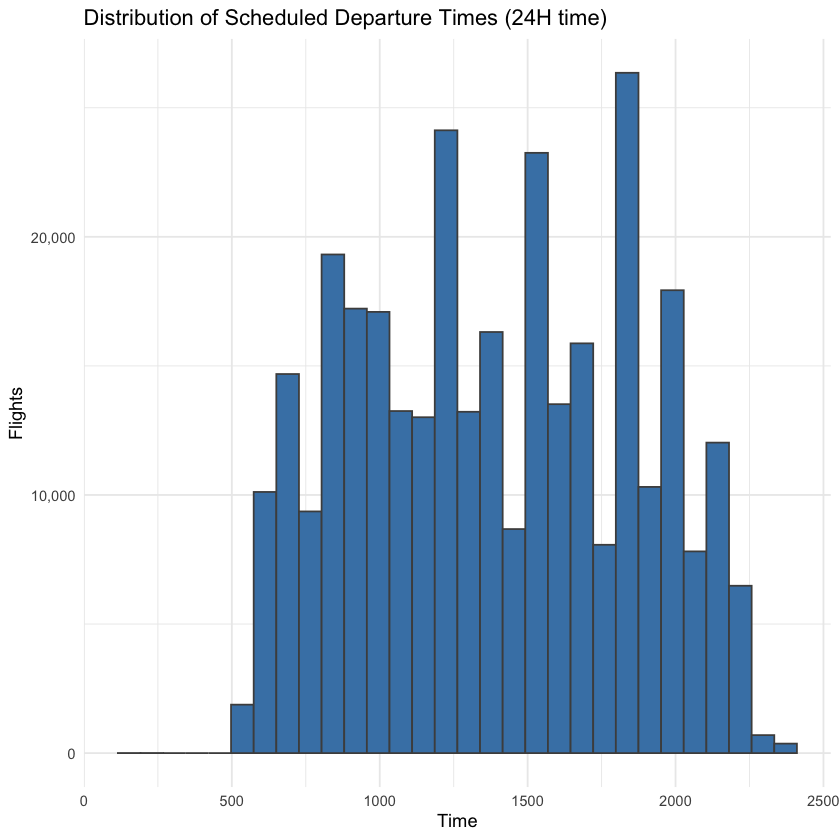

In [18]:
# Visualize the distribution of scheduled departures before we cluster
ggplot(df, aes(x = scheduled_departure)) + 
  geom_histogram(fill = "steelblue", color = "gray30") +
  labs(title = "Distribution of Scheduled Departure Times (24H time)",
       x = "Time",
       y = "Flights") +
  scale_y_continuous(label = comma) +
  theme_minimal()

Next, we will run k-means clustering with specified group of 5. We chose 5 based on the number of bins we originally chose for this variable (early morning, morning, afternoon, evening, overnight). The distribution also supports the ability to sub-divide into five new groups.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


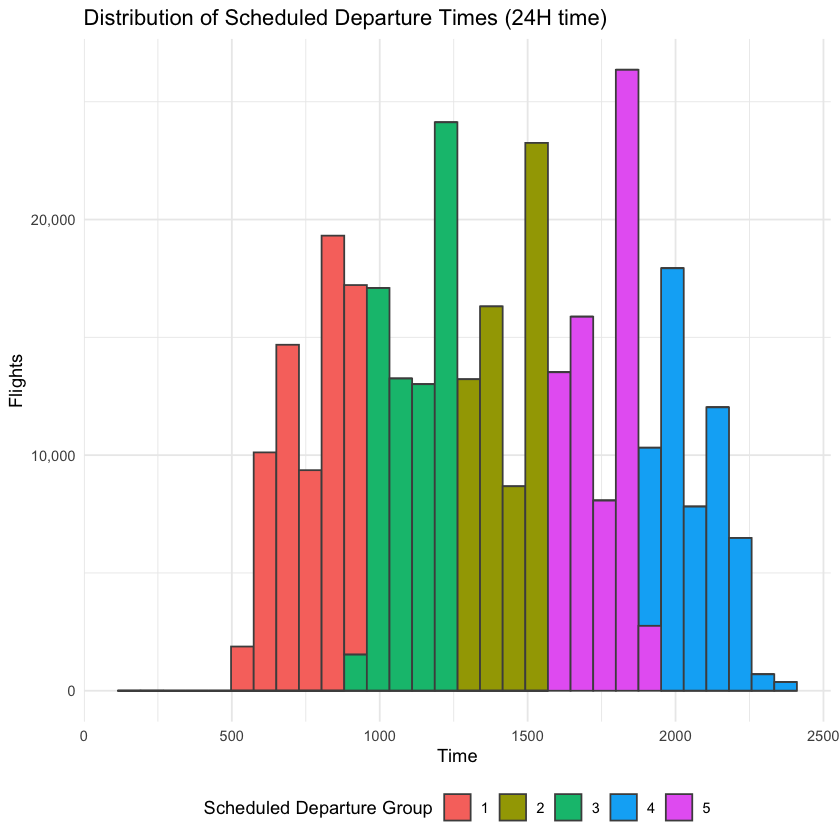

In [19]:
set.seed(1234)

# Run kmeans with k=5, meaning we will create 5 distinct groups for scheduled_departure
kmeans_sched_depart <- kmeans(as.matrix(df$scheduled_departure), 5, nstart = 15)

# Merge with df
df$sched_depart_group <- as.factor(kmeans_sched_depart$cluster)

# Visualize cluster to see if 5 was appropriate
ggplot(df, aes(x = scheduled_departure)) + 
  geom_histogram(aes(fill = sched_depart_group), color = "gray30") +
  labs(title = "Distribution of Scheduled Departure Times (24H time)",
       x = "Time",
       y = "Flights",
       fill = "Scheduled Departure Group") +
  scale_y_continuous(label = comma) +
  theme_minimal() + 
  theme(legend.position = "bottom")

The chosen 5 groups appear to be pretty evenly spread out. Where, in previous labs, we cut the data using blocks of time that "felt right", it is interesting to see how clustering splits the data. We will proceed to cut our data using the distribution above as guidance to approximate where each cluster splits.

In [20]:
# Check min and max
summary(df$scheduled_departure)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    140    1020    1352    1388    1805    2359 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


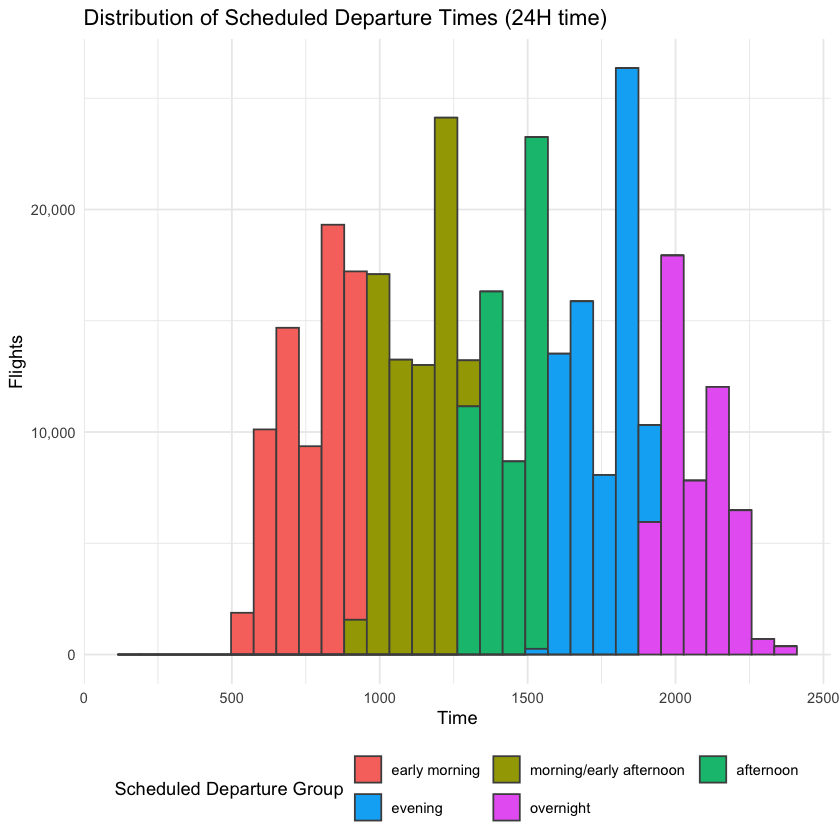

In [21]:
# Perform grouping based on estimating cluster values
df$scheduled_departure_group <- cut(as.numeric(df$scheduled_departure),
                                    breaks = c(0, 945, 1300, 1555, 1915, 2359),
                                    labels = c("early morning", "morning/early afternoon", "afternoon", "evening",
                                               "overnight"))

ggplot(df, aes(x = scheduled_departure)) + 
  geom_histogram(aes(fill = scheduled_departure_group), color = "gray30") +
  labs(title = "Distribution of Scheduled Departure Times (24H time)",
       x = "Time",
       y = "Flights",
       fill = "Scheduled Departure Group") +
  scale_y_continuous(label = comma) +
  theme_minimal() + 
  theme(legend.position = "bottom") +
  guides(fill = guide_legend(nrow = 2,byrow = TRUE))

#### Scheduled Arrival

We repeat the same exercise on the scheduled arrival times.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


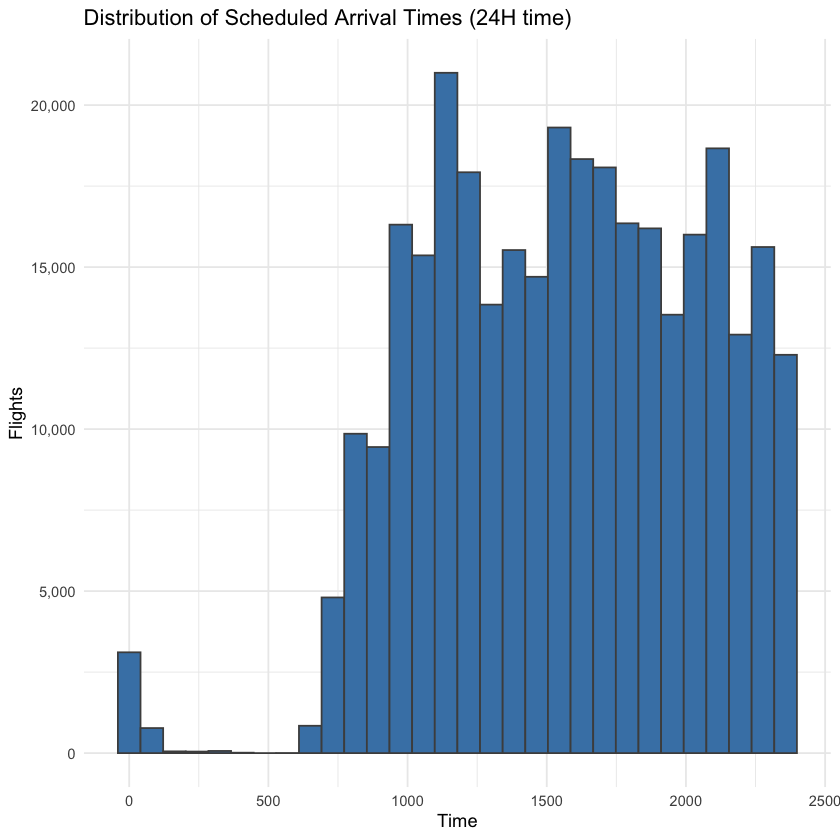

In [22]:
# Visualize the distribution of scheduled arrival times before we cluster
ggplot(df, aes(x = scheduled_arrival)) + 
  geom_histogram(fill = "steelblue", color = "gray30") +
  labs(title = "Distribution of Scheduled Arrival Times (24H time)",
       x = "Time",
       y = "Flights") +
  scale_y_continuous(label = comma) +
  theme_minimal()

This distribution is different than the scheduled departures in that we have some outliers around midnight and much less frequent flights between 1:00 AM and 5:30 AM. Since we are doing association rule analysis, outliers will not skew our results so it is okay to keep these in the data. We want to know if there are any interesting rules or assocations that relate to flights during this time frame.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


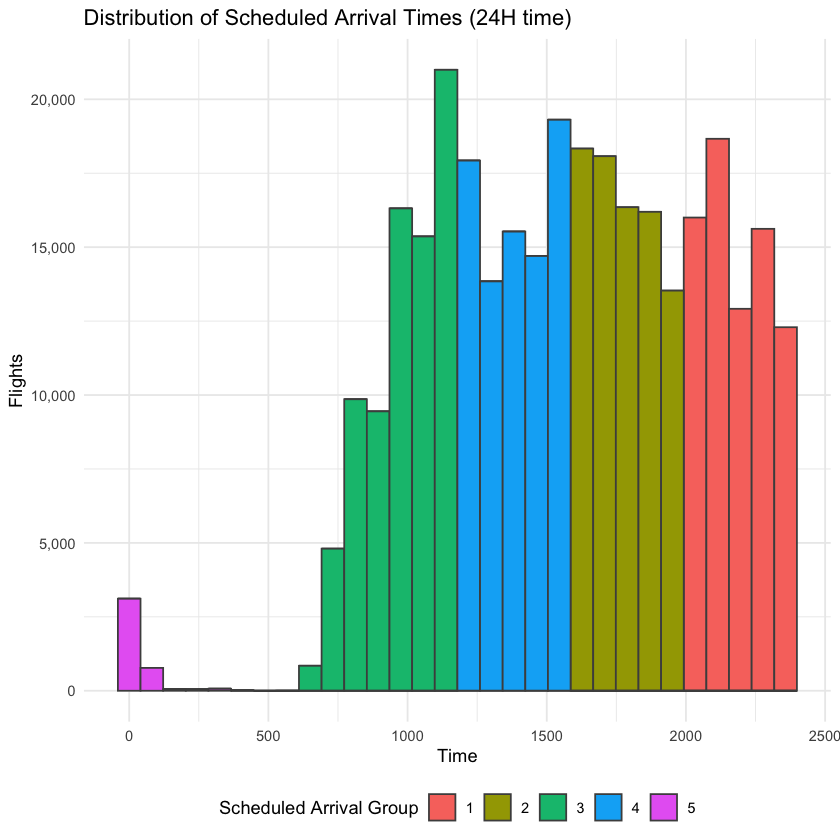

In [23]:
# Run kmeans with k=5, meaning we will create 5 distinct groups for scheduled_arrival
kmeans_sched_arrive <- kmeans(as.matrix(df$scheduled_arrival), 5, nstart = 15)

# Merge df
df$sched_arrive_group <- as.factor(kmeans_sched_arrive$cluster)

# Visualize cluster
ggplot(df, aes(x = scheduled_arrival)) + 
  geom_histogram(aes(fill = sched_arrive_group), color = "gray30") +
  labs(title = "Distribution of Scheduled Arrival Times (24H time)",
       x = "Time",
       y = "Flights",
       fill = "Scheduled Arrival Group") +
  scale_y_continuous(label = comma) +
  theme_minimal() + 
  theme(legend.position = "bottom")

In [24]:
# Check min and max
summary(df$scheduled_arrival)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1    1155    1550    1560    1944    2359 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


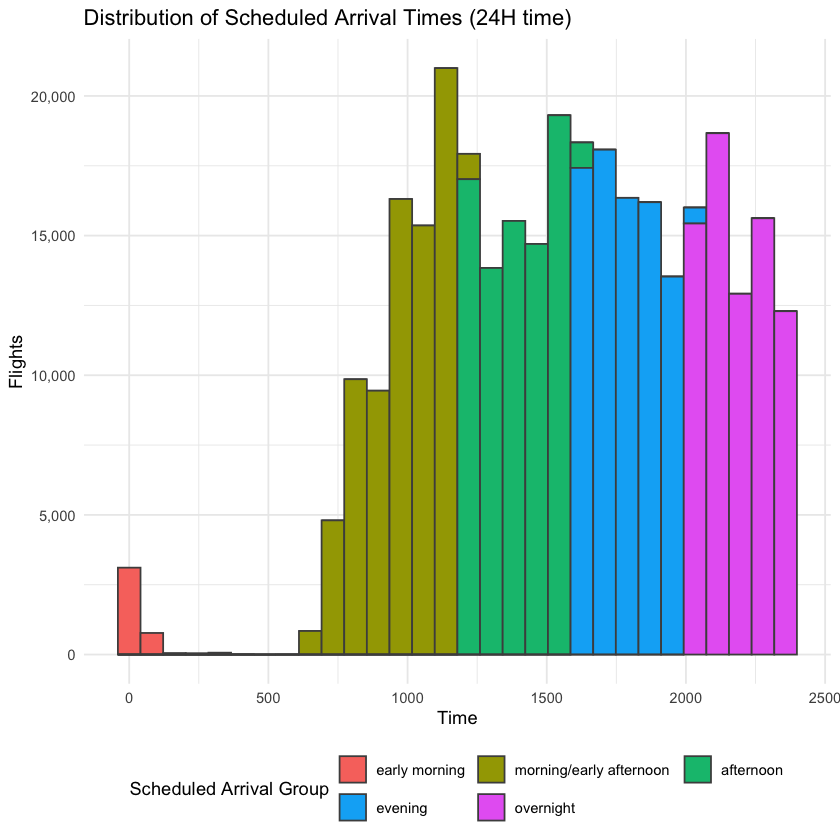

In [25]:
# Perform grouping based on estimating cluster values
df$scheduled_arrival_group <- cut(as.numeric(df$scheduled_arrival),
                                    breaks = c(0, 500, 1200, 1600, 2000, 2359),
                                    labels = c("early morning", "morning/early afternoon", "afternoon", "evening",
                                               "overnight"))

ggplot(df, aes(x = scheduled_arrival)) + 
  geom_histogram(aes(fill = scheduled_arrival_group), color = "gray30") +
  labs(title = "Distribution of Scheduled Arrival Times (24H time)",
       x = "Time",
       y = "Flights",
       fill = "Scheduled Arrival Group") +
  scale_y_continuous(label = comma) +
  theme_minimal() + 
  theme(legend.position = "bottom") +
  guides(fill = guide_legend(nrow = 2,byrow = TRUE))

#### Distance

We will perform our final clustering on distance.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


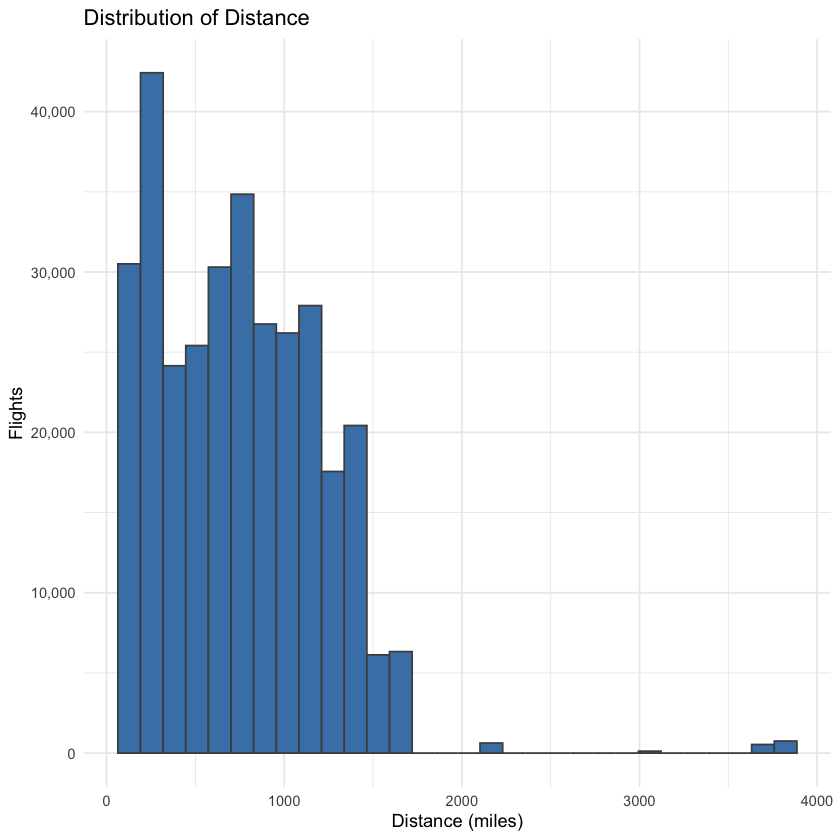

In [26]:
# Visualize the distribution of distance before we cluster
ggplot(df, aes(x = distance)) + 
  geom_histogram(fill = "steelblue", color = "gray30") +
  labs(title = "Distribution of Distance",
       x = "Distance (miles)",
       y = "Flights") +
  scale_y_continuous(label = comma) +
  theme_minimal()

Since our data set is comprised of domestic flights, and we have subset our data to the DFW market, it is not surprising that the vast majority of flights fall into the < ~1,600 mile range. For this grouping, we will use four groupings instead of 5.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


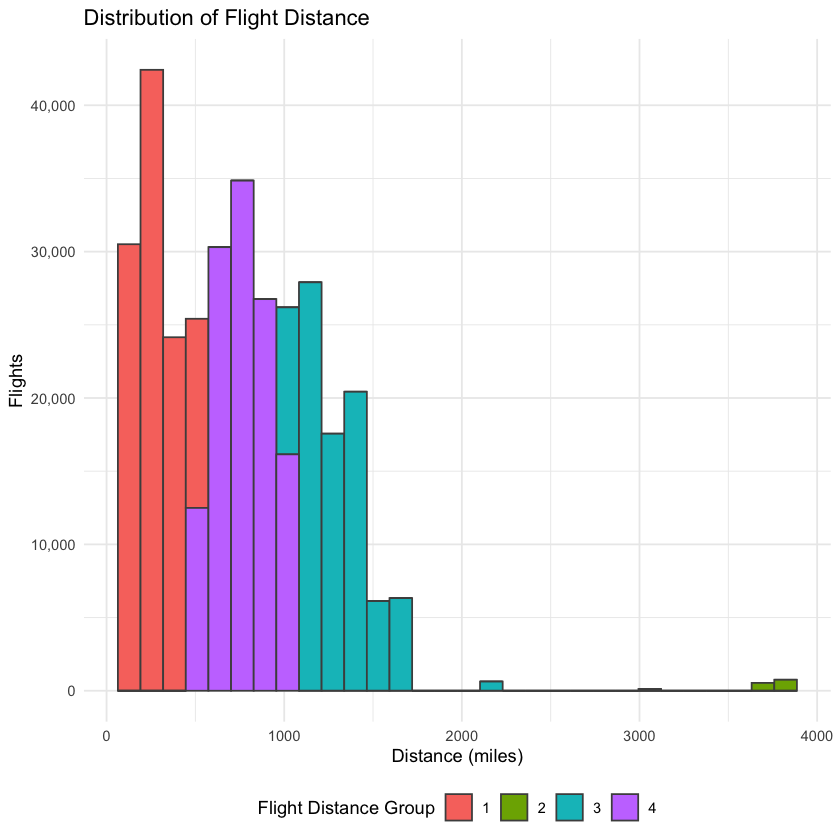

In [27]:
# Run kmeans with k=4, meaning we will create 4 distinct groups
kmeans_dist <- kmeans(as.matrix(df$distance), 4, nstart = 15)

# Merge df
df$distance_bucket <- as.factor(kmeans_dist$cluster)

# Visualize cluster
ggplot(df, aes(x = distance)) + 
  geom_histogram(aes(fill = distance_bucket), color = "gray30") +
  labs(title = "Distribution of Flight Distance",
       x = "Distance (miles)",
       y = "Flights",
       fill = "Flight Distance Group") +
  scale_y_continuous(label = comma) +
  theme_minimal() + 
  theme(legend.position = "bottom")

In [28]:
# Check min and max
summary(df$distance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   89.0   354.0   731.0   760.8  1102.0  3784.0 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


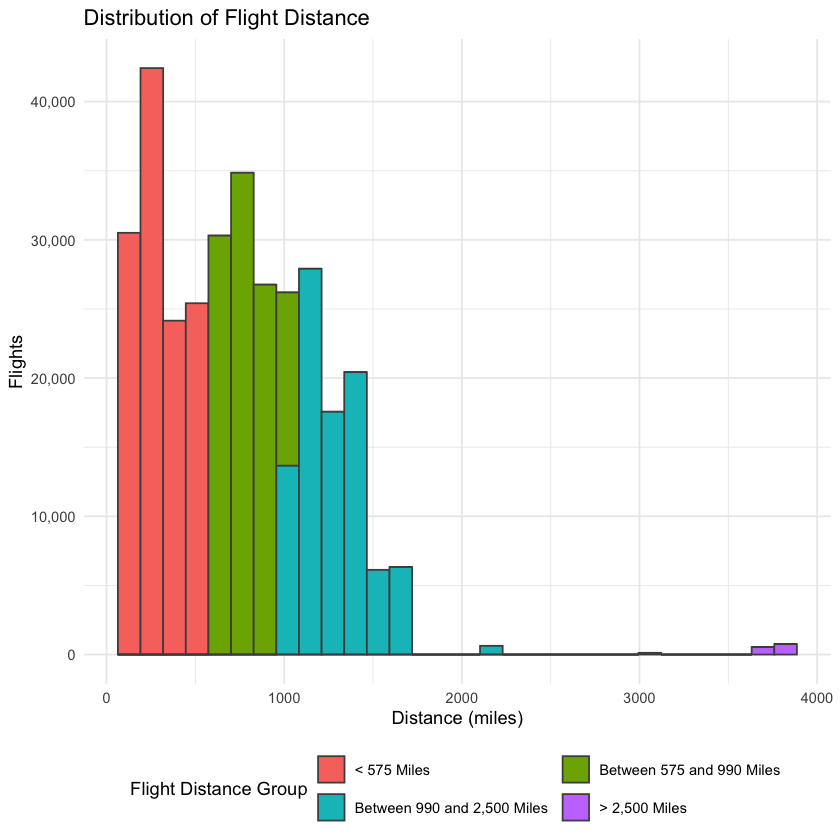

In [29]:
# Perform grouping based on estimating cluster values
df$distance_group <- cut(as.numeric(df$distance),
                                  breaks = c(0, 575, 990, 2500, 4000),
                                  labels = c("< 575 Miles", 
                                             "Between 575 and 990 Miles", 
                                             "Between 990 and 2,500 Miles", 
                                             "> 2,500 Miles"))

# Plot flight distance groups
ggplot(df, aes(x = distance)) + 
 geom_histogram(aes(fill = distance_group), color = "gray30") +
  labs(title = "Distribution of Flight Distance",
       x = "Distance (miles)",
       y = "Flights",
       fill = "Flight Distance Group") +
  scale_y_continuous(label = comma) +
  theme_minimal() + 
  theme(legend.position = "bottom") +
  guides(fill = guide_legend(nrow = 2,byrow = TRUE))

In [30]:
# Remove now redundant variables
df <- df %>%
    select(-c('scheduled_departure', 'scheduled_arrival', 'distance'))

Having clustered these three variables, it has been interesting to see the way an algorithm defines the cuts and the ways it is similar and different from the way we approached it manually. 

### Prepare for Association Rule Mining

In preparation for association rule mining we need to perform some final data cleanup. These include:

- Converting numeric values to binary ones
- Cutting numeric values into bins
- Converting numeric values for day of week into ordered labels
- Removing the remaining numeric values
- Converting the final set of features into factors

In [31]:
# Update for human readability
df <- df %>% 
  mutate(delayed_on_arrival = if_else(arrival_delay > 0, "Yes", "No")) %>%
  mutate(delayed_on_depart = if_else(departure_delay > 0, "Yes", "No"))

# Create binary variables for association rules
df <- df %>% 
  mutate(air_system_delay = if_else(air_system_delay > 0, "Yes", "No")) %>%
  mutate(security_delay = if_else(security_delay > 0, "Yes", "No")) %>%
  mutate(airline_delay = if_else(airline_delay > 0, "Yes", "No")) %>%
  mutate(late_aircraft_delay = if_else(late_aircraft_delay > 0,"Yes", "No")) %>%
  mutate(weather_delay = if_else(weather_delay > 0, "Yes", "No"))

df <- df %>% 
  mutate(diverted = if_else(diverted == 1, "Yes", "No")) %>%
  mutate(cancelled = if_else(cancelled == 1, "Yes", "No")) %>%
  mutate(departed = if_else(departed == 1, "Yes", "No")) %>%
  mutate(arrived = if_else(arrived == 1, "Yes", "No"))

# Convert day of week to factor
day_of_week <- tibble(number = c(1, 2, 3, 4, 5, 6, 7),
                      weekday = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
df <- left_join(df, day_of_week, by = c("day_of_week" = "number"))

# Convert month to a factor
df <- df %>% mutate(month = month(df$month, label = TRUE))

# Convert numeric variables to range factors
df <- df %>% 
  mutate(temp_range = cut(df$temp, 10),  # temperature
         pressure_range = cut(df$pressure, 10),  # barometric pressure
         wind_speed_range = cut(df$wind_speed, 10),  # wind speed
         rain_1h_range = cut(df$rain_1h, 10),  # rain_1h
         rain_3h_range = cut(df$rain_3h, 10)  # rain_3h
  )

# Convert everything to a factor
df <- df %>% 
  mutate_if(is.character,as.factor)

#remove remaining numeric variables
df <- df %>%
    select(-c('year', 'day', 'day_of_week', 'flight_number', 'taxi_out', 'scheduled_time',
             'elapsed_time', 'air_time', 'taxi_in', 'temp', 'pressure', 'humidity', 'wind_speed',
             'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
             'arrival_delay', 'departure_delay', 'airline'))

# Check data
str(df)

tibble [320,977 × 30] (S3: tbl_df/tbl/data.frame)
 $ month                    : Ord.factor w/ 12 levels "Jan"<"Feb"<"Mar"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ airline_code             : Factor w/ 13 levels "AA","AS","B6",..: 1 4 1 1 7 8 8 9 9 11 ...
 $ tail_number              : Factor w/ 3691 levels "7819A","7820L",..: 1010 910 1977 1145 3023 2205 2040 2861 2503 2332 ...
 $ origin_airport           : Factor w/ 2 levels "DAL","DFW": 2 2 2 2 2 2 2 1 2 2 ...
 $ destination_airport      : Factor w/ 150 levels "ABI","ABQ","ACT",..: 93 8 86 81 18 103 47 66 36 113 ...
 $ departed                 : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ arrived                  : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ diverted                 : Factor w/ 1 level "No": 1 1 1 1 1 1 1 1 1 1 ...
 $ cancelled                : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ cancellation_reason      : Factor w/ 4 levels "A","B","C","N": 4 4 4 4 2 4 4 4 4 4 ...
 $ air_system_

Now that the data is prepped, we convert it into transactions ahead of association rule mining and to visualize frequent itemsets.

In [32]:
# Convert to a transactional data set
df_txn <- as(df, "transactions")

# Inspect transaction set
summary(df_txn)

transactions as itemMatrix in sparse format with
 320977 rows (elements/itemsets/transactions) and
 3988 columns (items) and a density of 0.007522568 

most frequent items:
                 diverted=No            security_delay=No 
                      320977                       320694 
 rain_3h_range=(-0.102,10.2] rain_1h_range=(-0.0495,4.95] 
                      319580                       317169 
                departed=Yes                      (Other) 
                      312355                      8038535 

element (itemset/transaction) length distribution:
sizes
    30 
320977 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     30      30      30      30      30      30 

includes extended item information - examples:
     labels variables levels
1 month=Jan     month    Jan
2 month=Feb     month    Feb
3 month=Mar     month    Mar

includes extended transaction information - examples:
  transactionID
1             1
2             2
3             3

#### Visualize Transaction Features

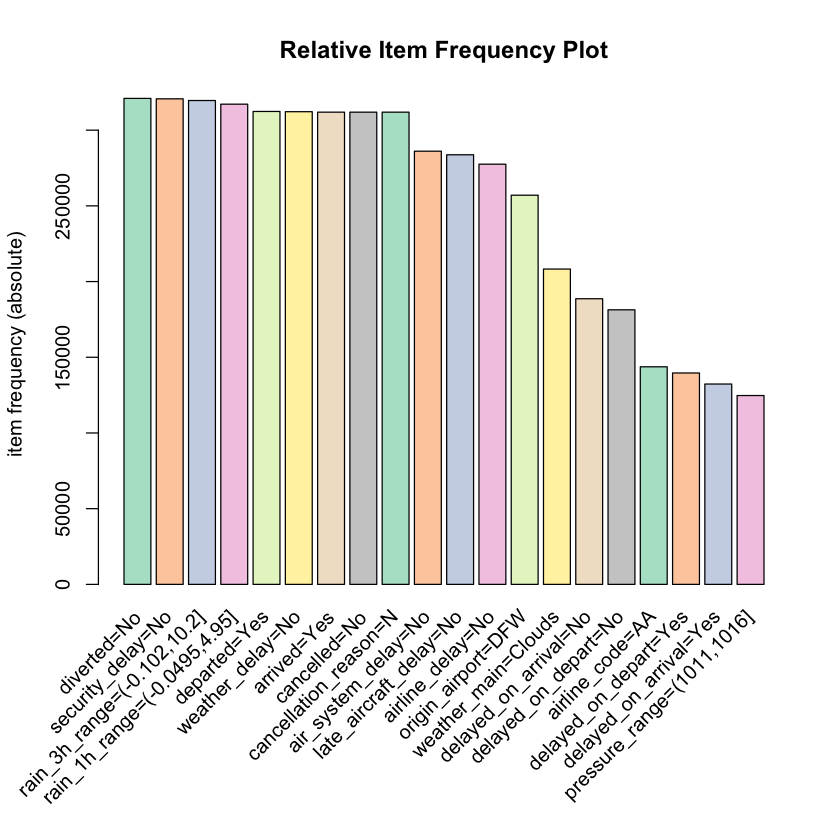

In [33]:
# Visualize the top 20 most relatively frequent items
itemFrequencyPlot(df_txn,
                  topN = 20,
                  type = "absolute",
                  col = brewer.pal(8,'Pastel2'), 
                  main = "Relative Item Frequency Plot")

Visualizing relative item frequency gives us a chance to begin to identify items that may appear more frequently in our forthcoming rules. Knowing, for example, that `diverted = No` is the most frequent item, we may decide to exclude that from our ruleset in order to find more unique and interesting rules. 

In [34]:
# Find frequent itemsets with default support of 0.1.
freq <- apriori(df_txn, parameter = list(target = "frequent",
                                         maxtime = 0,
                                         minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       0     0.1      2
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 32097 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[3978 item(s), 320977 transaction(s)] done [1.73s].
sorting and recoding items ... [70 item(s)] done [0.09s].
creating transaction tree ... done [0.29s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10 done [449.89s].
sorting transactions ... done [0.08s].
writing ... [1951009 set(s)] done [0.26s].
creating S4 object  ... done [0.77s].


In [35]:
freq <- sort(freq, by = "count")
# inspect(head(freq, n = 10))
as(head(freq, n = 10), "data.frame")

,items,support,transIdenticalToItemsets,count
993,"{diverted=No,security_delay=No}",0.9991183,0,320694
992,"{diverted=No,rain_3h_range=(-0.102,10.2]}",0.9956477,0,319580
991,"{security_delay=No,rain_3h_range=(-0.102,10.2]}",0.9947691,0,319298
7983,"{diverted=No,security_delay=No,rain_3h_range=(-0.102,10.2]}",0.9947691,0,319298
990,"{diverted=No,rain_1h_range=(-0.0495,4.95]}",0.9881362,0,317169
989,"{security_delay=No,rain_1h_range=(-0.0495,4.95]}",0.9872545,0,316886
7982,"{diverted=No,security_delay=No,rain_1h_range=(-0.0495,4.95]}",0.9872545,0,316886
988,"{rain_1h_range=(-0.0495,4.95],rain_3h_range=(-0.102,10.2]}",0.9857466,0,316402
7981,"{diverted=No,rain_1h_range=(-0.0495,4.95],rain_3h_range=(-0.102,10.2]}",0.9857466,0,316402
7980,"{security_delay=No,rain_1h_range=(-0.0495,4.95],rain_3h_range=(-0.102,10.2]}",0.9848681,0,316120


Having run `apriori` on our data set and printed the 10 most frequent itemsets, the results line up with the items that we saw in the relative item frequency plot.

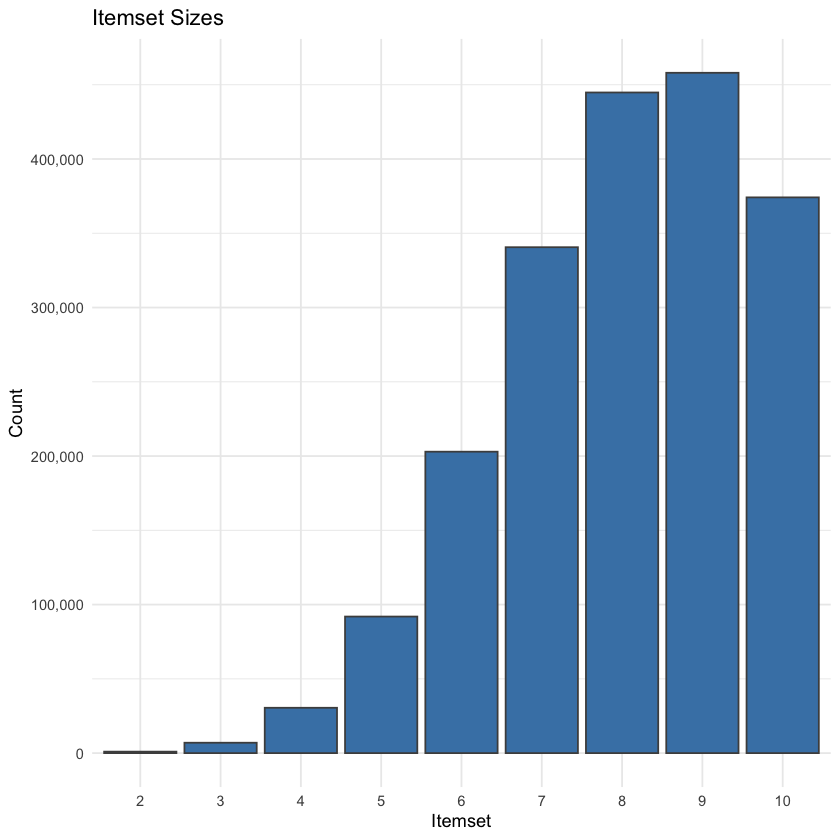

In [36]:
# Check itemset size distribution
ggplot(tibble(`Itemset Size` = factor(size(freq))), aes(`Itemset Size`)) + 
  geom_bar(fill = "steelblue", color = "gray30") +
  labs(title = "Itemset Sizes",
       x = "Itemset",
       y = "Count") +
  scale_y_continuous(label = comma) +
  theme_minimal()

The itemset size distribution shows a steady increase up to a maximum of around 450,000 in itemsets with 9 items. The apriori algorithm defaults to max out at 10 items per set, but based on the peak at 9, we would estimate it would mimic a bell curve with the max itemset around 18 items. Let's look at the same data using a log10 scale to better visualize the smaller itemset counts.

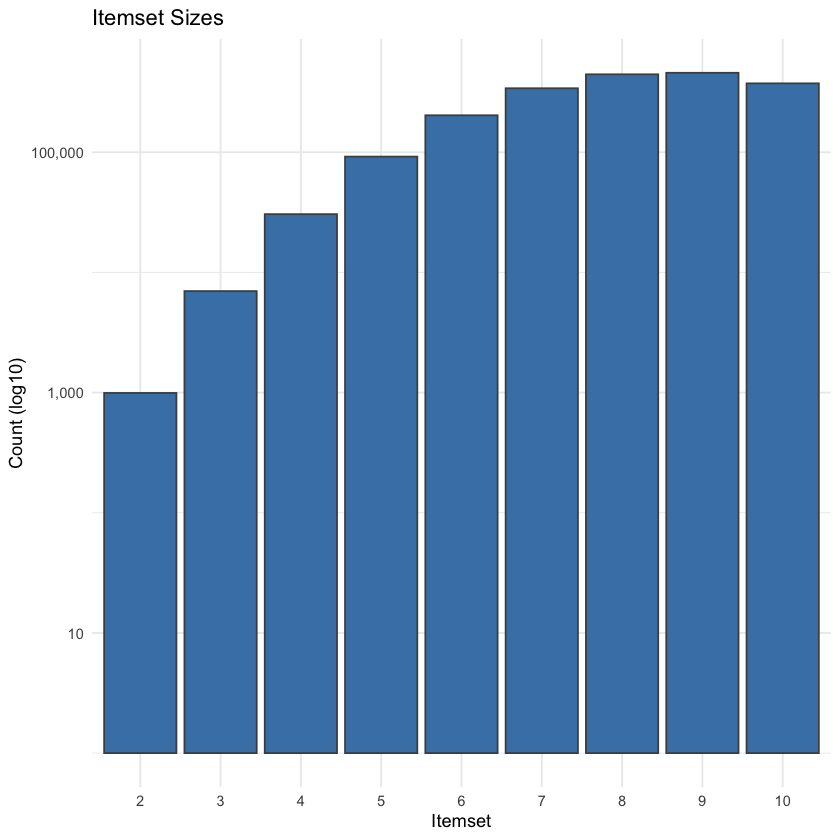

In [37]:
# Look at the same plot on a log10 scale
ggplot(tibble(`Itemset Size` = factor(size(freq))), aes(`Itemset Size`)) + 
   geom_bar(fill = "steelblue", color = "gray30") +
  labs(title = "Itemset Sizes",
       x = "Itemset",
       y = "Count (log10)") +
  scale_y_log10(label = comma) +
  theme_minimal()

Itemsets with a length of 2 appear around 1,000 times in our data set, compared to the max of 450,000 for length of 9.

# Modeling and Evaluation
Jump to [top](#Rubric)

## Modeling and Evaluation 1

> Train and adjust parameters

# Association Rule Mining

## Initial Rule Set

We now are going to start digging into association rules. First, we will explore a subset of the rules with no specified right hand side (RHS) value, but we select our variables based on items we think would be important for cancellations.

In [38]:
# Select an initial subset for rule mining
#select variables that appear to relate to if a flight might be cancelled.
df_set1 <- df %>%
    select(destination_airport,
          airline_code,
          destination_airport,
          cancellation_reason,
          diverted,
          weather_main
          )

# Convert to a transactional data set
df_set1_txn <- as(df_set1, "transactions")

# Create first set of rules
# test using support = 0.01 and confidence at 0.8
df_set1_rules <- apriori(df_set1_txn, parameter = list(support = 0.001, 
                                                       confidence = 0.8,
                                                       minlen = 3,
                                                       maxtime = 0))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       0   0.001      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 320 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[178 item(s), 320977 transaction(s)] done [0.09s].
sorting and recoding items ... [168 item(s)] done [0.01s].
creating transaction tree ... done [0.09s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [3766 rule(s)] done [0.00s].
creating S4 object  ... done [0.04s].


In [39]:
# Look at 10 of the rules sorted by lift
df_set1_rules_sorted <- sort(df_set1_rules, by = "lift")
# inspect(head(df_set1_rules_sorted, 10))
as(head(df_set1_rules_sorted, n = 10), "data.frame")

,rules,support,confidence,coverage,lift,count
110,"{airline_code=B6,weather_main=Clouds} => {destination_airport=BOS}",0.001271119,1.0000000,0.001271119,94.37724,408
112,"{airline_code=B6,cancellation_reason=N} => {destination_airport=BOS}",0.001937834,1.0000000,0.001937834,94.37724,622
114,"{airline_code=B6,diverted=No} => {destination_airport=BOS}",0.001993912,1.0000000,0.001993912,94.37724,640
1620,"{airline_code=B6,cancellation_reason=N,weather_main=Clouds} => {destination_airport=BOS}",0.001236849,1.0000000,0.001236849,94.37724,397
1622,"{airline_code=B6,diverted=No,weather_main=Clouds} => {destination_airport=BOS}",0.001271119,1.0000000,0.001271119,94.37724,408
1625,"{airline_code=B6,cancellation_reason=N,diverted=No} => {destination_airport=BOS}",0.001937834,1.0000000,0.001937834,94.37724,622
3245,"{airline_code=B6,cancellation_reason=N,diverted=No,weather_main=Clouds} => {destination_airport=BOS}",0.001236849,1.0000000,0.001236849,94.37724,397
1353,"{airline_code=DL,weather_main=Mist} => {destination_airport=ATL}",0.001495434,0.8067227,0.001853715,24.23392,480
2986,"{airline_code=DL,diverted=No,weather_main=Mist} => {destination_airport=ATL}",0.001495434,0.8067227,0.001853715,24.23392,480
2984,"{airline_code=DL,cancellation_reason=N,weather_main=Mist} => {destination_airport=ATL}",0.001467395,0.8037543,0.001825676,24.14475,471


The 7 rules with the highest lift (94.37724) all share similar characteristics. They all have Boston Logan International Airport on the right hand side and JetBlue on the left hand side. Clouds are also frequent LHS characteristics. 

From personal experience, we know that the only airport that JetBlue flies to from DFW is BOS, therefore it isn't a surprise that JetBlue flights to Boston have a disproportionately high lift value compared to other rules. 

### Removing Redundant Rules

The following code removes any redundant rules. Before subsetting, we had 3,766 rules.  After running the code below, we have 2,821 rules.

In [40]:
#Code creates the subrules for the two plots below.  It removes any redundant rules.
# source: https://www.datacamp.com/community/tutorials/market-basket-analysis-r

subset.rules1 <- which(colSums(is.subset(df_set1_rules, df_set1_rules)) > 1) # get subset rules in vector
length(subset.rules1)
subset.rules1 <- df_set1_rules[-subset.rules1] # remove subset rules.

[1] 2821

In [41]:
subset.rules1_sorted <- sort(subset.rules1, by = "lift")
# inspect(head(subset.rules1_sorted, 10))
as(head(subset.rules1_sorted, n = 10), "data.frame")

,rules,support,confidence,coverage,lift,count
110,"{airline_code=B6,weather_main=Clouds} => {destination_airport=BOS}",0.001271119,1.0000000,0.001271119,94.377242,408
1353,"{airline_code=DL,weather_main=Mist} => {destination_airport=ATL}",0.001495434,0.8067227,0.001853715,24.233919,480
86,"{destination_airport=MEI,weather_main=Clouds} => {airline_code=EV}",0.001320967,1.0000000,0.001320967,12.230025,424
371,"{destination_airport=MLU,weather_main=Clouds} => {airline_code=EV}",0.002090492,0.9710564,0.002152802,11.876044,671
464,"{destination_airport=BRO,weather_main=Clouds} => {airline_code=EV}",0.002109185,0.9075067,0.002324154,11.098829,677
821,"{destination_airport=SHV,weather_main=Clouds} => {airline_code=EV}",0.004473841,0.9031447,0.004953626,11.045481,1436
695,"{destination_airport=TYS,weather_main=Clouds} => {airline_code=EV}",0.003084333,0.8616188,0.003579696,10.537619,990
380,"{destination_airport=CAE,weather_main=Clouds} => {airline_code=EV}",0.001738442,0.8378378,0.002074915,10.246778,558
752,"{destination_airport=MDW,weather_main=Clouds} => {airline_code=WN}",0.004261988,1.0000000,0.004261988,5.694211,1368
45,"{destination_airport=GSP,weather_main=Clouds} => {airline_code=MQ}",0.001018765,1.0000000,0.001018765,5.519906,327


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


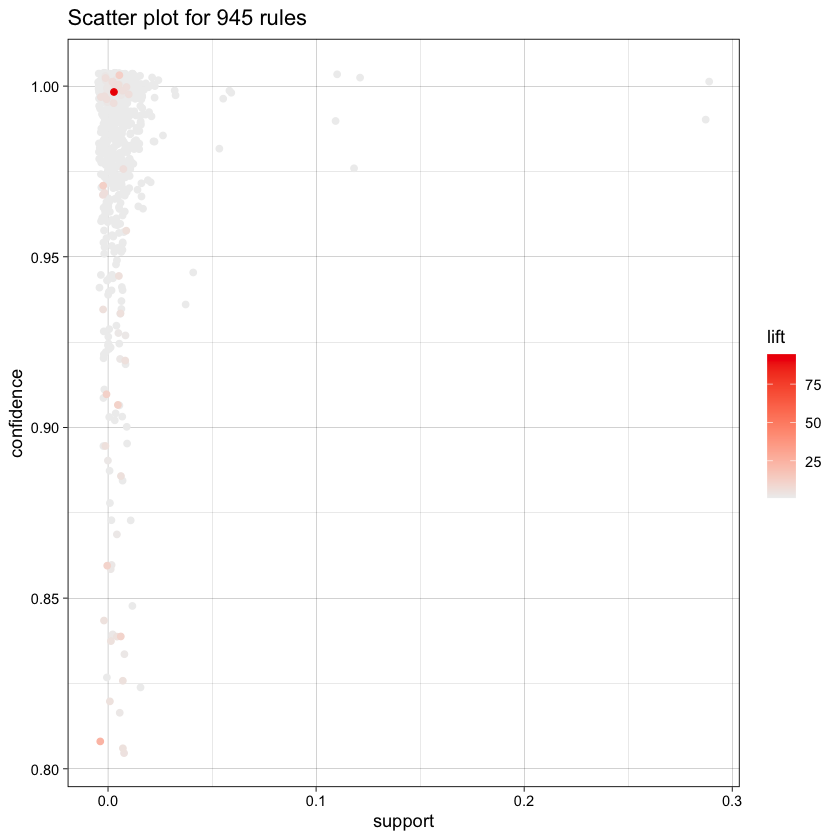

In [42]:
# Plot rules
plot(subset.rules1)

Plotting the rules above shows one rule in particular with very high lift, which is the JetBlue/Boston rule noted above. We will provide additional interpretation of these rules in the Modeling and Evaluation 2 section, but this graph shows that the majority of our rules have less than 0.05 support but tend to have more than 0.95 confidence.

## Cancelled on RHS

Having first tried to mine rules for cancellation by choosing specific features, we now used a significantly expanded feature set and specifying `cancelled` on the right hand side (RHS). 

In [43]:
# Select a subset for rule mining
df_set2 <- df %>% 
  select(month,
         airline_code,
         tail_number,
         origin_airport,
         destination_airport,
         weekday,
         air_system_delay,
         security_delay,
         airline_delay,
         late_aircraft_delay,
         weather_delay,
         weather_main,
         delayed_on_arrival,
         delayed_on_depart,
         distance_group,
         temp_range,
         pressure_range,
         wind_speed_range,
         rain_1h_range,
         rain_3h_range,
         cancelled)

# Convert to a transactional data set
df_set2_txn <- as(df_set2, "transactions")

cancelled <- grep("cancelled", itemLabels(df_set2_txn), value = TRUE)

# Create rules
df_set2_rules <- apriori(df_set2_txn, 
                         appearance = list(rhs = cancelled),
                         parameter = list(support = 0.01,
                                          confidence = 0.8,
                                          minlen = 3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3209 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[3945 item(s), 320977 transaction(s)] done [1.12s].
sorting and recoding items ... [111 item(s)] done [0.05s].
creating transaction tree ... done [0.23s].
checking subsets of size 1 2 3 4 5 done [10.53s].
writing ... [80547 rule(s)] done [0.01s].
creating S4 object  ... done [0.16s].


In [44]:
# Inspect rules
# inspect(head(df_set2_rules, n = 10, by = "lift"))
as(head(df_set2_rules, n = 10), "data.frame")

rules,support,confidence,coverage,lift,count
"{destination_airport=SLC,weather_delay=No} => {cancelled=No}",0.01003499,0.9844132,0.01019388,1.013098,3221
"{destination_airport=SLC,rain_1h_range=(-0.0495,4.95]} => {cancelled=No}",0.01016584,0.9866949,0.01030292,1.015446,3263
"{destination_airport=SLC,rain_3h_range=(-0.102,10.2]} => {cancelled=No}",0.01024372,0.9847260,0.01040261,1.013419,3288
"{destination_airport=SLC,security_delay=No} => {cancelled=No}",0.01025930,0.9847488,0.01041819,1.013443,3293
"{airline_code=US,origin_airport=DFW} => {cancelled=No}",0.01049919,1.0000000,0.01049919,1.029139,3370
"{airline_code=US,weather_delay=No} => {cancelled=No}",0.01033719,1.0000000,0.01033719,1.029139,3318
"{airline_code=US,rain_1h_range=(-0.0495,4.95]} => {cancelled=No}",0.01032473,1.0000000,0.01032473,1.029139,3314
"{airline_code=US,rain_3h_range=(-0.102,10.2]} => {cancelled=No}",0.01041508,1.0000000,0.01041508,1.029139,3343
"{airline_code=US,security_delay=No} => {cancelled=No}",0.01049919,1.0000000,0.01049919,1.029139,3370
"{destination_airport=BOS,distance_group=Between 990 and 2,500 Miles} => {cancelled=No}",0.01033719,0.9755954,0.01059577,1.004023,3318


Our top ten rules in terms of lift all have a confidence of 1, and all are non-cancelled flights. Let's filter to cancelled flights only as that is what we are interested in being able to determine.

In [45]:
df_set3 <- df_set2 %>%
    filter(cancelled == 'Yes')

df_set3_txn <- as(df_set3, "transactions")

cancelled <- grep("cancelled", itemLabels(df_set3_txn), value = TRUE)

# Create rules
df_set3_rules <- apriori(df_set3_txn, 
                         appearance = list(rhs = cancelled),
                         parameter = list(support = 0.01,
                                          confidence = 0.8,
                                          minlen = 3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[1561 item(s), 9088 transaction(s)] done [0.04s].
sorting and recoding items ... [105 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 done [8.35s].
writing ... [2148559 rule(s)] done [0.30s].
creating S4 object  ... done [0.89s].


In [46]:
# Inspect rules
# inspect(head(df_set3_rules, n = 10, by = "lift"))
as(head(df_set3_rules, n = 10, by = "lift"), "data.frame")

rules,support,confidence,coverage,lift,count
"{destination_airport=LIT,distance_group=< 575 Miles} => {cancelled=Yes}",0.01034331,1,0.01034331,1,94
"{destination_airport=LIT,rain_3h_range=(-0.102,10.2]} => {cancelled=Yes}",0.01034331,1,0.01034331,1,94
"{destination_airport=LIT,delayed_on_depart=No} => {cancelled=Yes}",0.01034331,1,0.01034331,1,94
"{destination_airport=LIT,delayed_on_arrival=No} => {cancelled=Yes}",0.01034331,1,0.01034331,1,94
"{destination_airport=LIT,weather_delay=No} => {cancelled=Yes}",0.01034331,1,0.01034331,1,94
"{destination_airport=LIT,late_aircraft_delay=No} => {cancelled=Yes}",0.01034331,1,0.01034331,1,94
"{destination_airport=LIT,airline_delay=No} => {cancelled=Yes}",0.01034331,1,0.01034331,1,94
"{destination_airport=LIT,security_delay=No} => {cancelled=Yes}",0.01034331,1,0.01034331,1,94
"{destination_airport=LIT,air_system_delay=No} => {cancelled=Yes}",0.01034331,1,0.01034331,1,94
"{airline_code=VX,origin_airport=DAL} => {cancelled=Yes}",0.01045335,1,0.01045335,1,95


Lift for our top rules are all equal to 1 and confidence is also equal to 1. According to above, most of our cancelled flights were going to LIT (Bill and Hillary Clinton National Airport in Little Rock, AR). Changing confidence won't get us a different set of rules, but let's modify support to see if that makes any difference. To determine our support value, let's check the summary statistics of this rule set.

In [47]:
summary(df_set3_rules)

set of 2148559 rules

rule length distribution (lhs + rhs):sizes
     3      4      5      6      7      8      9 
  1736  13366  61341 188238 411204 663614 809060 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   7.000   8.000   7.895   9.000   9.000 

summary of quality measures:
    support          confidence    coverage            lift       count       
 Min.   :0.01001   Min.   :1    Min.   :0.01001   Min.   :1   Min.   :  91.0  
 1st Qu.:0.01265   1st Qu.:1    1st Qu.:0.01265   1st Qu.:1   1st Qu.: 115.0  
 Median :0.01706   Median :1    Median :0.01706   Median :1   Median : 155.0  
 Mean   :0.02670   Mean   :1    Mean   :0.02670   Mean   :1   Mean   : 242.7  
 3rd Qu.:0.02718   3rd Qu.:1    3rd Qu.:0.02718   3rd Qu.:1   3rd Qu.: 247.0  
 Max.   :1.00000   Max.   :1    Max.   :1.00000   Max.   :1   Max.   :9088.0  

mining info:
        data ntransactions support confidence
 df_set3_txn          9088    0.01        0.8

All of our 2,148,559 rules have a confidence value of 1 and lift values of 1. The count ranges from 91 occurrences to 9,088. Our support ranges from 0.01 to 1. The majority of the rules have support less than 0.03. Let's see what our rules look like when we set support to 0.03. 

In [48]:
df_set3_rules <- apriori(df_set3_txn, 
                         appearance = list(rhs = cancelled),
                         parameter = list(support = 0.03,
                                          confidence = 0.8,
                                          minlen = 3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.03      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 272 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[1561 item(s), 9088 transaction(s)] done [0.03s].
sorting and recoding items ... [63 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10 done [2.31s].
writing ... [565021 rule(s)] done [0.08s].
creating S4 object  ... done [0.24s].


In [49]:
# Inspect rules
# inspect(head(df_set3_rules, n = 10, by = "lift"))
as(head(df_set3_rules, n = 10, by = "lift"), "data.frame")

rules,support,confidence,coverage,lift,count
"{destination_airport=HOU,distance_group=< 575 Miles} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,rain_3h_range=(-0.102,10.2]} => {cancelled=Yes}",0.03003961,1,0.03003961,1,273
"{destination_airport=HOU,air_system_delay=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,security_delay=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,airline_delay=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,late_aircraft_delay=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,weather_delay=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,delayed_on_arrival=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,delayed_on_depart=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{weather_main=Clear,rain_1h_range=(-0.0495,4.95]} => {cancelled=Yes}",0.03235035,1,0.03235035,1,294


In [50]:
summary(df_set3_rules)

set of 565021 rules

rule length distribution (lhs + rhs):sizes
     3      4      5      6      7      8      9     10 
   863   5652  22038  57074 104145 138438 136450 100361 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   7.000   8.000   8.046   9.000  10.000 

summary of quality measures:
    support          confidence    coverage            lift       count       
 Min.   :0.03004   Min.   :1    Min.   :0.03004   Min.   :1   Min.   : 273.0  
 1st Qu.:0.03488   1st Qu.:1    1st Qu.:0.03488   1st Qu.:1   1st Qu.: 317.0  
 Median :0.04456   Median :1    Median :0.04456   Median :1   Median : 405.0  
 Mean   :0.06193   Mean   :1    Mean   :0.06193   Mean   :1   Mean   : 562.8  
 3rd Qu.:0.06580   3rd Qu.:1    3rd Qu.:0.06580   3rd Qu.:1   3rd Qu.: 598.0  
 Max.   :1.00000   Max.   :1    Max.   :1.00000   Max.   :1   Max.   :9088.0  

mining info:
        data ntransactions support confidence
 df_set3_txn          9088    0.03        0.8

Our set of rules has now decreased to only 565,021 rules. Let's use this as our final set for evaluation in the following section.

### Removing Redundant Rules

The following code removes any redundant rules. Before subsetting, we had 565,021 rules.  After running the code below, we have 564,158 rules.

In [51]:
#Code removes redundant rules for Cancelled on RHS model.
# source: https://www.datacamp.com/community/tutorials/market-basket-analysis-r

subset.rules3 <- which(colSums(is.subset(df_set3_rules, df_set3_rules)) > 1) # get subset rules in vector
length(subset.rules3)
subset.rules3 <- df_set3_rules[-subset.rules3] # remove subset rules.

[1] 564158

### Visualize Rule Set

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


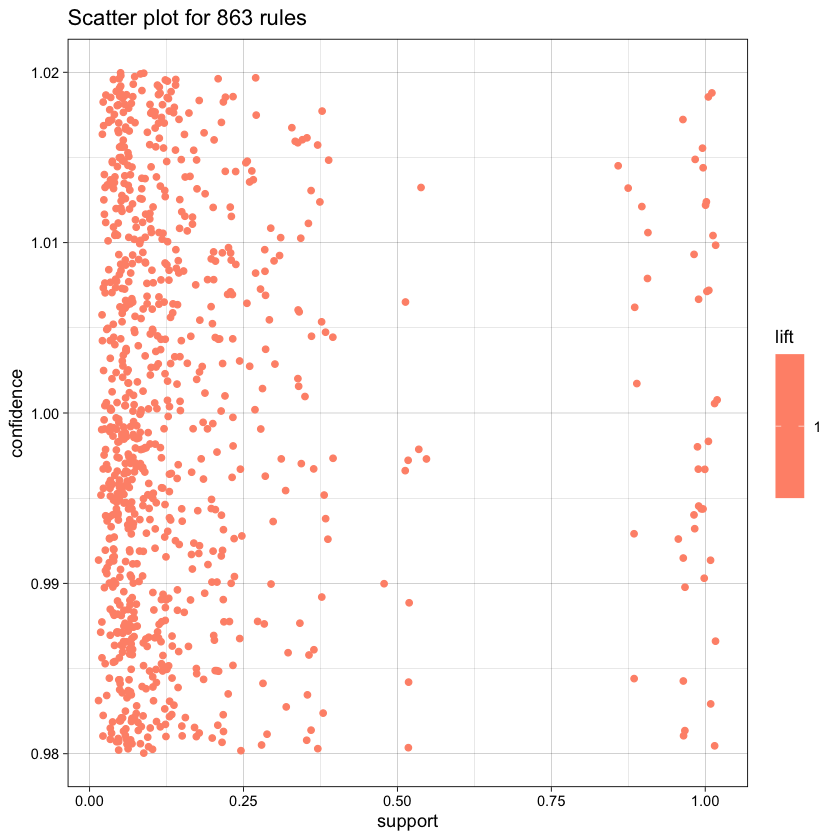

In [52]:
# Plot rules
plot(subset.rules3)

After removing redundant rules, our dataset is densest between 0.00 and 0.25 on the support axis meaning the rules do not appear as frequently in the dataset. We see a range on the confidence axis from 0.98 to 1.02 for the near zero support datapoints, which indicates the rules are true. There are a few data points along the 1.0 support line indicating those rules still repeat frequently after removing the redundant rules.

## Delayed_on_departure on RHS

After looking at cancellations, we wanted to see if there were any interesting rules based on `delayed_on_departure` being on the right hand side.

In [53]:
# Select a subset for rule mining
df_set6 <- df %>% 
  select(month,
         airline_code,
         tail_number,
         origin_airport,
         destination_airport,
         weekday,
         air_system_delay,
         security_delay,
         airline_delay,
         late_aircraft_delay,
         weather_delay,
         weather_main,
         delayed_on_arrival,
         scheduled_departure_group,
         scheduled_arrival_group,
         distance_group,
         temp_range,
         pressure_range,
         wind_speed_range,
         rain_1h_range,
         rain_3h_range,
         delayed_on_depart)

# Convert to a transactional data set
df_set6_txn <- as(df_set6, "transactions")

delayed_on_depart <- grep("delayed_on_depart", itemLabels(df_set6_txn), value = TRUE)

# Create rules
df_set6_rules <- apriori(df_set6_txn, 
                         appearance = list(rhs = delayed_on_depart),
                         parameter = list(support = 0.01,
                                          confidence = 0.8,
                                          minlen = 3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3209 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[3953 item(s), 320977 transaction(s)] done [1.17s].
sorting and recoding items ... [119 item(s)] done [0.06s].
creating transaction tree ... done [0.23s].
checking subsets of size 1 2 3 4 5 done [12.97s].
writing ... [14777 rule(s)] done [0.01s].
creating S4 object  ... done [0.12s].


In [54]:
# Look at 10 of the rules
# inspect(head(df_set6_rules, n = 20, by = "lift"))
as(head(df_set6_rules, n = 20, by = "lift"), "data.frame")

,rules,support,confidence,coverage,lift,count
7,"{late_aircraft_delay=Yes,weather_delay=Yes} => {delayed_on_depart=Yes}",0.01545905,1,0.01545905,2.298867,4962
8,"{weather_delay=Yes,distance_group=< 575 Miles} => {delayed_on_depart=Yes}",0.01056462,1,0.01056462,2.298867,3391
10,"{airline_code=AA,weather_delay=Yes} => {delayed_on_depart=Yes}",0.01163946,1,0.01163946,2.298867,3736
12,"{origin_airport=DFW,weather_delay=Yes} => {delayed_on_depart=Yes}",0.02346274,1,0.02346274,2.298867,7531
30,"{airline_code=EV,late_aircraft_delay=Yes} => {delayed_on_depart=Yes}",0.01231241,1,0.01231241,2.298867,3952
31,"{airline_code=EV,airline_delay=Yes} => {delayed_on_depart=Yes}",0.01306324,1,0.01306324,2.298867,4193
35,"{late_aircraft_delay=Yes,pressure_range=(1007,1011]} => {delayed_on_depart=Yes}",0.01485153,1,0.01485153,2.298867,4767
40,"{late_aircraft_delay=Yes,weather_main=Rain} => {delayed_on_depart=Yes}",0.01640304,1,0.01640304,2.298867,5265
44,"{late_aircraft_delay=Yes,weather_main=Mist} => {delayed_on_depart=Yes}",0.01587964,1,0.01587964,2.298867,5097
52,"{month=Nov,airline_delay=Yes} => {delayed_on_depart=Yes}",0.01046181,1,0.01046181,2.298867,3358


In [55]:
summary(df_set6_rules)

set of 14777 rules

rule length distribution (lhs + rhs):sizes
    3     4     5 
  260  2606 11911 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   5.000   4.788   5.000   5.000 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.01000   Min.   :0.8000   Min.   :0.01000   Min.   :1.416  
 1st Qu.:0.01264   1st Qu.:0.8229   1st Qu.:0.01412   1st Qu.:1.475  
 Median :0.01744   Median :0.8665   Median :0.01963   Median :1.865  
 Mean   :0.03117   Mean   :0.8931   Mean   :0.03599   Mean   :1.845  
 3rd Qu.:0.03170   3rd Qu.:0.9996   3rd Qu.:0.03609   3rd Qu.:2.298  
 Max.   :0.47853   Max.   :1.0000   Max.   :0.58775   Max.   :2.299  
     count       
 Min.   :  3211  
 1st Qu.:  4058  
 Median :  5597  
 Mean   : 10006  
 3rd Qu.: 10174  
 Max.   :153598  

mining info:
        data ntransactions support confidence
 df_set6_txn        320977    0.01        0.8

We end up with a total of 14,777 rules, which is much smaller than our cancellation set. Support maxes out only at 0.48 but we do get rules with a confidence of 1. Lift is above one for all of our rules, so this at least tells us our variables within the rules are dependent on each other. Let's remove the rules that are subsets of each other to see how many are left.

### Removing Redundant Rules

The following code removes any redundant rules. Before subsetting, we had 14,777 rules.  After running the code below, we have 14,393 rules which is not a significant reduction.

In [56]:
#Code creates the subrules for the two plots below.  It removes any redundant rules.
# source: https://www.datacamp.com/community/tutorials/market-basket-analysis-r

subset.rules6 <- which(colSums(is.subset(df_set6_rules, df_set6_rules)) > 1) # get subset rules in vector
length(subset.rules6)
subset.rules6 <- df_set6_rules[-subset.rules6] # remove subset rules.

[1] 14393

We take a look at our top 10 rules to see  what was removed.

In [57]:
# Look at 10 of the rules
# inspect(head(subset.rules6, n = 10, by = "lift"))
as(head(subset.rules6, n = 10, by = "lift"), "data.frame")

,rules,support,confidence,coverage,lift,count
7,"{late_aircraft_delay=Yes,weather_delay=Yes} => {delayed_on_depart=Yes}",0.01545905,1,0.01545905,2.298867,4962
8,"{weather_delay=Yes,distance_group=< 575 Miles} => {delayed_on_depart=Yes}",0.01056462,1,0.01056462,2.298867,3391
10,"{airline_code=AA,weather_delay=Yes} => {delayed_on_depart=Yes}",0.01163946,1,0.01163946,2.298867,3736
12,"{origin_airport=DFW,weather_delay=Yes} => {delayed_on_depart=Yes}",0.02346274,1,0.02346274,2.298867,7531
30,"{airline_code=EV,late_aircraft_delay=Yes} => {delayed_on_depart=Yes}",0.01231241,1,0.01231241,2.298867,3952
31,"{airline_code=EV,airline_delay=Yes} => {delayed_on_depart=Yes}",0.01306324,1,0.01306324,2.298867,4193
35,"{late_aircraft_delay=Yes,pressure_range=(1007,1011]} => {delayed_on_depart=Yes}",0.01485153,1,0.01485153,2.298867,4767
40,"{late_aircraft_delay=Yes,weather_main=Rain} => {delayed_on_depart=Yes}",0.01640304,1,0.01640304,2.298867,5265
44,"{late_aircraft_delay=Yes,weather_main=Mist} => {delayed_on_depart=Yes}",0.01587964,1,0.01587964,2.298867,5097
52,"{month=Nov,airline_delay=Yes} => {delayed_on_depart=Yes}",0.01046181,1,0.01046181,2.298867,3358


### Visualize Rule Set

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


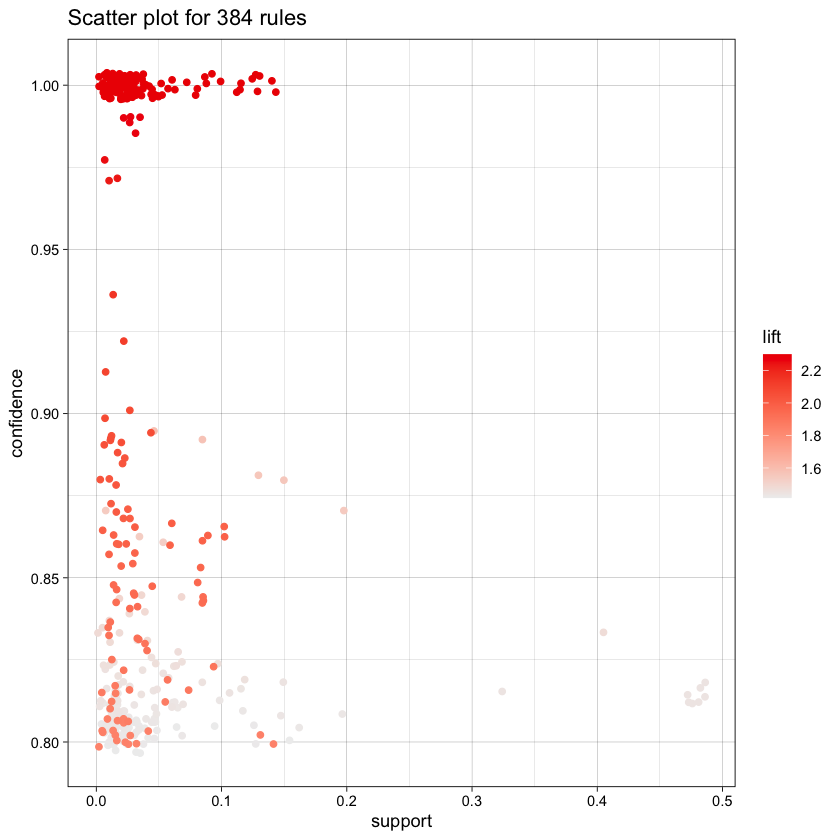

In [58]:
# Plot rules
plot(subset.rules6)

After removing redundant rules, nearly all our datapoints have a support of 0.0 to 0.15, indicating they do not repeat significantly in our dataset. The datapoints are densest at a confidence of 1.0, also indicating the rules are true for the dataset. We will take a closer look and evaluate these rules in the Modeling and Evaluation 2 section.

## Delayed_on_arrival on RHS

Lastly, we wanted to take a look at the set of rules we would get setting `delayed_on_arrival` on the right hand side.

In [59]:
df_set8 <- df %>% 
  select(month,
         airline_code,
         tail_number,
         origin_airport,
         destination_airport,
         weekday,
         weather_main,
         scheduled_departure_group,
         scheduled_arrival_group,
         distance_group,
         delayed_on_depart,
         temp_range,
         pressure_range,
         wind_speed_range,
         rain_1h_range,
         rain_3h_range,
         delayed_on_arrival)


# Convert to a transactional data set
df_set8_txn <- as(df_set8, "transactions")

delayed_on_arrival <- grep("delayed_on_arrival", itemLabels(df_set8_txn), value = TRUE)

# Create rules
df_set8_rules <- apriori(df_set8_txn, 
                         appearance = list(rhs = delayed_on_arrival),
                         parameter = list(support = 0.1, 
                                          confidence = 0.8, 
                                          minlen = 3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 32097 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[3943 item(s), 320977 transaction(s)] done [0.88s].
sorting and recoding items ... [45 item(s)] done [0.04s].
creating transaction tree ... done [0.17s].
checking subsets of size 1 2 3 4 5 6 7 done [0.41s].
writing ... [155 rule(s)] done [0.00s].
creating S4 object  ... done [0.07s].


In [60]:
# Look at 10 of the rules
# inspect(head(df_set8_rules, n = 10, by = "lift"))
as(head(df_set8_rules, n = 10, by = "lift"), "data.frame")

,rules,support,confidence,coverage,lift,count
13,"{distance_group=< 575 Miles,delayed_on_depart=Yes} => {delayed_on_arrival=Yes}",0.1287725,0.8192377,0.1571857,1.987217,41333
56,"{distance_group=< 575 Miles,delayed_on_depart=Yes,rain_3h_range=(-0.102,10.2]} => {delayed_on_arrival=Yes}",0.1278939,0.8188419,0.1561888,1.986257,41051
55,"{distance_group=< 575 Miles,delayed_on_depart=Yes,rain_1h_range=(-0.0495,4.95]} => {delayed_on_arrival=Yes}",0.1267817,0.8181343,0.1549644,1.984540,40694
107,"{distance_group=< 575 Miles,delayed_on_depart=Yes,rain_1h_range=(-0.0495,4.95],rain_3h_range=(-0.102,10.2]} => {delayed_on_arrival=Yes}",0.1262770,0.8178205,0.1544067,1.983779,40532
65,"{airline_code=AA,weather_main=Clouds,delayed_on_depart=No} => {delayed_on_arrival=No}",0.1521791,0.8770897,0.1735046,1.492293,48846
120,"{airline_code=AA,origin_airport=DFW,weather_main=Clouds,delayed_on_depart=No} => {delayed_on_arrival=No}",0.1521791,0.8770897,0.1735046,1.492293,48846
121,"{airline_code=AA,weather_main=Clouds,delayed_on_depart=No,rain_1h_range=(-0.0495,4.95]} => {delayed_on_arrival=No}",0.1521791,0.8770897,0.1735046,1.492293,48846
122,"{airline_code=AA,weather_main=Clouds,delayed_on_depart=No,rain_3h_range=(-0.102,10.2]} => {delayed_on_arrival=No}",0.1521791,0.8770897,0.1735046,1.492293,48846
148,"{airline_code=AA,origin_airport=DFW,weather_main=Clouds,delayed_on_depart=No,rain_1h_range=(-0.0495,4.95]} => {delayed_on_arrival=No}",0.1521791,0.8770897,0.1735046,1.492293,48846
149,"{airline_code=AA,origin_airport=DFW,weather_main=Clouds,delayed_on_depart=No,rain_3h_range=(-0.102,10.2]} => {delayed_on_arrival=No}",0.1521791,0.8770897,0.1735046,1.492293,48846


The rules above do not appear to be very interesting because `delayed_on_depart` matched `delayed_on_arrival` for all of the top lift rule sets. Below, we reduced the support level from 0.1 to 0.01, filtered to `delayed_on_depart` = `Yes`, and set the `maxlen` to 4 in order to see if we would get a better set of rules.

In [61]:
df_set9 <- df %>% 
  select(month,
         airline_code,
         tail_number,
         origin_airport,
         destination_airport,
         weekday,
         weather_main,
         scheduled_departure_group,
         scheduled_arrival_group,
         distance_group,
         delayed_on_depart,
         temp_range,
         pressure_range,
         wind_speed_range,
         rain_1h_range,
         rain_3h_range,
         delayed_on_arrival)

df_set9 <- df_set9 %>% filter(delayed_on_depart =="Yes")

# Convert to a transactional data set
df_set9_txn <- as(df_set9, "transactions")

delayed_on_arrival <- grep("delayed_on_arrival", itemLabels(df_set9_txn), value = TRUE)

# Create rules
df_set9_rules <- apriori(df_set9_txn, 
                         appearance = list(rhs = delayed_on_arrival),
                         parameter = list(support = 0.01, 
                                          confidence = 0.8, 
                                          minlen = 3,
                                          maxlen = 4,
                                         maxtime = 100))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE     100    0.01      3
 maxlen target  ext
      4  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1396 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[3622 item(s), 139624 transaction(s)] done [0.38s].
sorting and recoding items ... [110 item(s)] done [0.02s].
creating transaction tree ... done [0.07s].
checking subsets of size 1 2 3 4 done [0.66s].
writing ... [1714 rule(s)] done [0.00s].
creating S4 object  ... done [0.05s].


In [62]:
# Look at 10 of the rules
# inspect(head(df_set9_rules, n = 10, by = "lift"))
as(head(df_set9_rules, n = 10, by = "lift"), "data.frame")

,rules,support,confidence,coverage,lift,count
67,"{airline_code=MQ,temp_range=(26.1,34.8]} => {delayed_on_arrival=Yes}",0.01417378,0.9455327,0.01499026,1.262507,1979
486,"{airline_code=MQ,origin_airport=DFW,temp_range=(26.1,34.8]} => {delayed_on_arrival=Yes}",0.01417378,0.9455327,0.01499026,1.262507,1979
487,"{airline_code=MQ,temp_range=(26.1,34.8],rain_1h_range=(-0.0495,4.95]} => {delayed_on_arrival=Yes}",0.01417378,0.9455327,0.01499026,1.262507,1979
488,"{airline_code=MQ,temp_range=(26.1,34.8],rain_3h_range=(-0.102,10.2]} => {delayed_on_arrival=Yes}",0.01417378,0.9455327,0.01499026,1.262507,1979
489,"{airline_code=MQ,delayed_on_depart=Yes,temp_range=(26.1,34.8]} => {delayed_on_arrival=Yes}",0.01417378,0.9455327,0.01499026,1.262507,1979
525,"{origin_airport=DFW,distance_group=< 575 Miles,temp_range=(26.1,34.8]} => {delayed_on_arrival=Yes}",0.01614336,0.9423077,0.01713173,1.258201,2254
1258,"{airline_code=MQ,distance_group=< 575 Miles,temp_range=(34.8,43.5]} => {delayed_on_arrival=Yes}",0.01275569,0.9324607,0.01367960,1.245053,1781
946,"{month=Jan,airline_code=MQ,temp_range=(34.8,43.5]} => {delayed_on_arrival=Yes}",0.01025612,0.9322917,0.01100097,1.244827,1432
967,"{month=Jan,airline_code=MQ,distance_group=< 575 Miles} => {delayed_on_arrival=Yes}",0.01360798,0.9295499,0.01463932,1.241166,1900
1024,"{airline_code=MQ,weather_main=Mist,distance_group=< 575 Miles} => {delayed_on_arrival=Yes}",0.01114422,0.9295102,0.01198934,1.241113,1556


After modifying our parameters, we see a commonality with the Envoy/American Eagle (MQ) airline appearing in the top 10 rules by lift. We will proceed with this set of rules for our evaluation as we believe specific airline information/rules would be more interesting to consumers and/or airlines.

### Removing Redundant Rules

The following code removes any redundant rules. Before subsetting, we had 1714 rules.  After running the code below, we have 1364 rules, which is a reduction of a little less than 400 rules.

In [63]:
subset.rules9 <- which(colSums(is.subset(df_set9_rules, df_set9_rules)) > 1) # get subset rules in vector
length(subset.rules9)
subset.rules9 <- df_set9_rules[-subset.rules9] # remove subset rules.

[1] 1364

### Visualize Rule Set

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


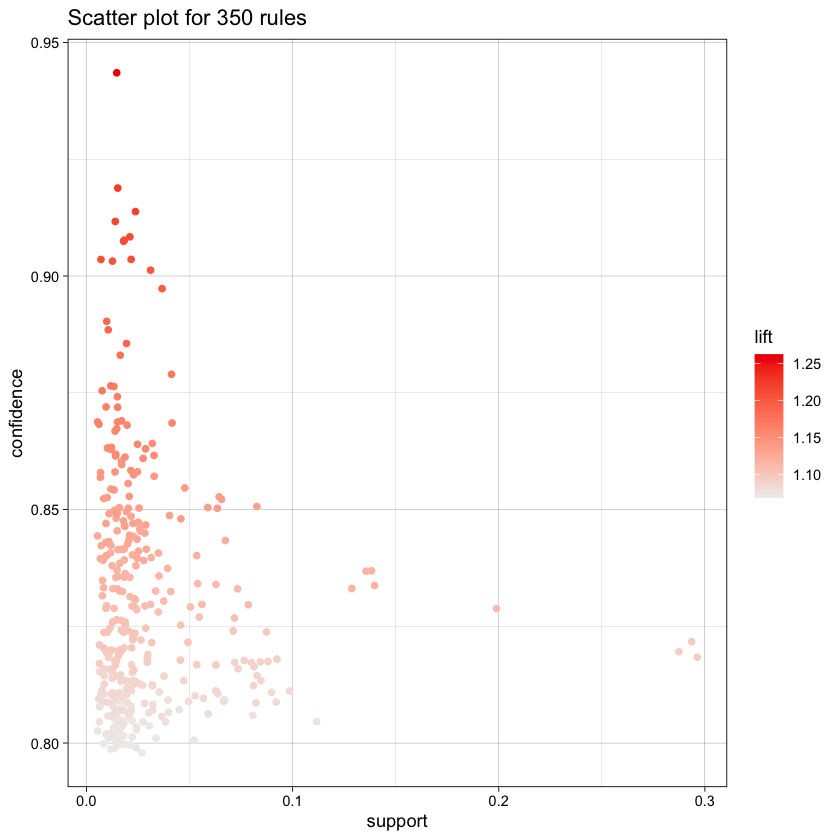

In [64]:
# Plot rules
plot(subset.rules9)

For this set of rules, we have a lower overall confidence level than our other sets, but we will evaluate the rules themselves in more detail later on.

## Modeling and Evaluation 2
Jump to [top](#Rubric)

> Evaluate and compare

### Initial Rule Set

This model began by using the following features from our `df` data set:

- destination_airport
- airline_code
- destination_airport
- cancellation_reason
- diverted
- weather_main

The final parameters used in our rule set were:

- `support = 0.001`
- `confidence = 0.8`
- `minlen = 3`
- `maxtime = 0`

In [65]:
summary(subset.rules1)

set of 945 rules

rule length distribution (lhs + rhs):sizes
  3 
945 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3       3       3       3       3       3 

summary of quality measures:
    support           confidence        coverage             lift        
 Min.   :0.001000   Min.   :0.8038   Min.   :0.001003   Min.   : 0.8469  
 1st Qu.:0.001558   1st Qu.:0.9802   1st Qu.:0.001570   1st Qu.: 1.0000  
 Median :0.002458   Median :1.0000   Median :0.002489   Median : 1.0000  
 Mean   :0.005403   Mean   :0.9844   Mean   :0.005474   Mean   : 1.3597  
 3rd Qu.:0.004854   3rd Qu.:1.0000   3rd Qu.:0.004922   3rd Qu.: 1.0152  
 Max.   :0.292074   Max.   :1.0000   Max.   :0.292074   Max.   :94.3772  
     count      
 Min.   :  321  
 1st Qu.:  500  
 Median :  789  
 Mean   : 1734  
 3rd Qu.: 1558  
 Max.   :93749  

mining info:
        data ntransactions support confidence
 df_set1_txn        320977   0.001        0.8

In [66]:
# inspect(head(subset.rules1_sorted, 25))
as(head(subset.rules1_sorted, n = 25), "data.frame")

,rules,support,confidence,coverage,lift,count
110,"{airline_code=B6,weather_main=Clouds} => {destination_airport=BOS}",0.001271119,1.0000000,0.001271119,94.377242,408
1353,"{airline_code=DL,weather_main=Mist} => {destination_airport=ATL}",0.001495434,0.8067227,0.001853715,24.233919,480
86,"{destination_airport=MEI,weather_main=Clouds} => {airline_code=EV}",0.001320967,1.0000000,0.001320967,12.230025,424
371,"{destination_airport=MLU,weather_main=Clouds} => {airline_code=EV}",0.002090492,0.9710564,0.002152802,11.876044,671
464,"{destination_airport=BRO,weather_main=Clouds} => {airline_code=EV}",0.002109185,0.9075067,0.002324154,11.098829,677
821,"{destination_airport=SHV,weather_main=Clouds} => {airline_code=EV}",0.004473841,0.9031447,0.004953626,11.045481,1436
695,"{destination_airport=TYS,weather_main=Clouds} => {airline_code=EV}",0.003084333,0.8616188,0.003579696,10.537619,990
380,"{destination_airport=CAE,weather_main=Clouds} => {airline_code=EV}",0.001738442,0.8378378,0.002074915,10.246778,558
752,"{destination_airport=MDW,weather_main=Clouds} => {airline_code=WN}",0.004261988,1.0000000,0.004261988,5.694211,1368
45,"{destination_airport=GSP,weather_main=Clouds} => {airline_code=MQ}",0.001018765,1.0000000,0.001018765,5.519906,327


We had very high lift for our top rule by lift. This had a lift value of 94.37. 

> {airline_code=B6,                                                                                   weather_main=Clouds} => {destination_airport=BOS}

However, this is not a very interesting rule. Airline code B6 is JetBlue, and from personal experience, we know this airline frequently flies from Dallas to Boston. 

Our next top rule, with a lift of 24.2, was also not very interesting as it essentially tells us Delta flies from Dallas to Atlanta often, which is a known Delta hub.

> {airline_code=DL,                                                                                        weather_main=Mist} => {destination_airport=ATL}

In the rules listed above, additionally, we can see that all the top rules excet one also include weather_main=Clouds. 

This broad approach - by not specifying a RHS value - gave us rules with high lift values but not a lot of usefulness. Our next set of rules have a specified RHS value to give more focus to our approach.

### Cancelled = Yes on RHS

This model began by using the following features from our `df` data set:

- airline_code
- tail_number
- origin_airport
- destination_airport
- weekday
- air_system_delay
- security_delay
- airline_delay
- late_aircraft_delay
- weather_delay
- weather_main
- delayed_on_arrival
- delayed_on_depart
- distance_group
- temp_range
- pressure_range
- wind_speed_range
- rain_1h_range
- rain_3h_range
- cancelled

Simply using those features with `cancelled` on the RHS resulted in the most frequent rules being from flights that weren't cancelled. We then filtered the data to only contain cancelled flights and ran the rules again using the following parameters:

- `support = 0.03`
- `confidence = 0.8`
- `minlen = 3`

In [67]:
summary(subset.rules3)

set of 863 rules

rule length distribution (lhs + rhs):sizes
  3 
863 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3       3       3       3       3       3 

summary of quality measures:
    support          confidence    coverage            lift       count     
 Min.   :0.03004   Min.   :1    Min.   :0.03004   Min.   :1   Min.   : 273  
 1st Qu.:0.05139   1st Qu.:1    1st Qu.:0.05139   1st Qu.:1   1st Qu.: 467  
 Median :0.09111   Median :1    Median :0.09111   Median :1   Median : 828  
 Mean   :0.16280   Mean   :1    Mean   :0.16280   Mean   :1   Mean   :1480  
 3rd Qu.:0.17408   3rd Qu.:1    3rd Qu.:0.17408   3rd Qu.:1   3rd Qu.:1582  
 Max.   :1.00000   Max.   :1    Max.   :1.00000   Max.   :1   Max.   :9088  

mining info:
        data ntransactions support confidence
 df_set3_txn          9088    0.03        0.8

In [70]:
# inspect(head(sort(subset.rules3, by = "lift"), 25))
as(head(sort(subset.rules3, by = "lift"), 25), "data.frame")

rules,support,confidence,coverage,lift,count
"{destination_airport=HOU,distance_group=< 575 Miles} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,rain_3h_range=(-0.102,10.2]} => {cancelled=Yes}",0.03003961,1,0.03003961,1,273
"{destination_airport=HOU,air_system_delay=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,security_delay=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,airline_delay=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,late_aircraft_delay=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,weather_delay=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,delayed_on_arrival=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{destination_airport=HOU,delayed_on_depart=No} => {cancelled=Yes}",0.03080986,1,0.03080986,1,280
"{weather_main=Clear,rain_1h_range=(-0.0495,4.95]} => {cancelled=Yes}",0.03235035,1,0.03235035,1,294


As we can see the in the rules above, Houston appears most frequently due to their high volume of flights as a major hub airport and cancellations for that volume of flights. Our top 25 rules, sorted by lift, all have a lift and confidence of 1. The top 9 rules all contain {destination_airport=HOU} on the LHS, but no other significant indicators that might explain why flights to Houston appear so frequently. 

The two LHS features that do appear to be interesting are the {rain_3h_range=(-0.102, 10.2)} and {rain_1h_range=(-0.0495,4.95)}. 

### Delayed_on_departure on RHS

This model began by using the following features from our `df` data set:

- month
- airline_code,
- tail_number,
- origin_airport,
- destination_airport,
- weekday,
- air_system_delay,
- security_delay,
- airline_delay,
- late_aircraft_delay,
- weather_delay,
- weather_main,
- delayed_on_arrival,
- scheduled_departure_group,
- scheduled_arrival_group,
- distance_group,
- temp_range,
- pressure_range,
- wind_speed_range,
- rain_1h_range,
- rain_3h_range,
- delayed_on_depart


We ran this model with the following parameters:

- `support = 0.01`
- `confidence = 0.8`
- `minlen = 3`

In [71]:
summary(subset.rules6)

set of 384 rules

rule length distribution (lhs + rhs):sizes
  3   4   5 
260  36  88 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   3.000   3.552   4.000   5.000 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.01002   Min.   :0.8000   Min.   :0.01028   Min.   :1.416  
 1st Qu.:0.01409   1st Qu.:0.8091   1st Qu.:0.01551   1st Qu.:1.436  
 Median :0.02199   Median :0.8412   Median :0.02510   Median :1.898  
 Mean   :0.04536   Mean   :0.8855   Mean   :0.05265   Mean   :1.853  
 3rd Qu.:0.04330   3rd Qu.:0.9995   3rd Qu.:0.05129   3rd Qu.:2.298  
 Max.   :0.47853   Max.   :1.0000   Max.   :0.58775   Max.   :2.299  
     count       
 Min.   :  3216  
 1st Qu.:  4522  
 Median :  7058  
 Mean   : 14560  
 3rd Qu.: 13898  
 Max.   :153598  

mining info:
        data ntransactions support confidence
 df_set6_txn        320977    0.01        0.8

In [72]:
# inspect(head(subset.rules6, n = 25, by = "lift"))
as(head(subset.rules6, n = 25, by = "lift"), "data.frame")

,rules,support,confidence,coverage,lift,count
7,"{late_aircraft_delay=Yes,weather_delay=Yes} => {delayed_on_depart=Yes}",0.01545905,1,0.01545905,2.298867,4962
8,"{weather_delay=Yes,distance_group=< 575 Miles} => {delayed_on_depart=Yes}",0.01056462,1,0.01056462,2.298867,3391
10,"{airline_code=AA,weather_delay=Yes} => {delayed_on_depart=Yes}",0.01163946,1,0.01163946,2.298867,3736
12,"{origin_airport=DFW,weather_delay=Yes} => {delayed_on_depart=Yes}",0.02346274,1,0.02346274,2.298867,7531
30,"{airline_code=EV,late_aircraft_delay=Yes} => {delayed_on_depart=Yes}",0.01231241,1,0.01231241,2.298867,3952
31,"{airline_code=EV,airline_delay=Yes} => {delayed_on_depart=Yes}",0.01306324,1,0.01306324,2.298867,4193
35,"{late_aircraft_delay=Yes,pressure_range=(1007,1011]} => {delayed_on_depart=Yes}",0.01485153,1,0.01485153,2.298867,4767
40,"{late_aircraft_delay=Yes,weather_main=Rain} => {delayed_on_depart=Yes}",0.01640304,1,0.01640304,2.298867,5265
44,"{late_aircraft_delay=Yes,weather_main=Mist} => {delayed_on_depart=Yes}",0.01587964,1,0.01587964,2.298867,5097
52,"{month=Nov,airline_delay=Yes} => {delayed_on_depart=Yes}",0.01046181,1,0.01046181,2.298867,3358


For this set of rules, each rule has a lift higher than 1, but upon further evaluation they don't appear to be very useful. Almost all of these rules include some sort of delay on the LHS, which makes it pretty obvious that you would have a delay on departure on the right hand side. When we next looked at arrival delays, we filtered out flights that were not delayed on departure to get rid of this dependency.

Overall, not many good insights from this rule mining.

### Delayed_on_arrival on RHS

This model began by using the following features from our `df` data set:

- month,
- airline_code,
- tail_number,
- origin_airport,
- destination_airport,
- weekday,
- weather_main,
- scheduled_departure_group,
- scheduled_arrival_group,
- distance_group,
- delayed_on_depart,
- temp_range,
- pressure_range,
- wind_speed_range,
- rain_1h_range,
- rain_3h_range,
- delayed_on_arrival

We also filtered for flights with `delayed_on_depart = 'Yes'` and the final `apriori` parameters included:

- `support = 0.01`
- `confidence = 0.8`
- `minlen = 3`
- `maxlen = 4`
- `maxtime = 100`

In [73]:
summary(subset.rules9)

set of 350 rules

rule length distribution (lhs + rhs):sizes
  3   4 
321  29 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   3.000   3.083   3.000   4.000 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.01001   Min.   :0.8000   Min.   :0.01158   Min.   :1.068  
 1st Qu.:0.01304   1st Qu.:0.8097   1st Qu.:0.01587   1st Qu.:1.081  
 Median :0.01835   Median :0.8232   Median :0.02229   Median :1.099  
 Mean   :0.02998   Mean   :0.8303   Mean   :0.03626   Mean   :1.109  
 3rd Qu.:0.02971   3rd Qu.:0.8442   3rd Qu.:0.03541   3rd Qu.:1.127  
 Max.   :0.29603   Max.   :0.9455   Max.   :0.36135   Max.   :1.263  
     count      
 Min.   : 1397  
 1st Qu.: 1821  
 Median : 2562  
 Mean   : 4186  
 3rd Qu.: 4148  
 Max.   :41333  

mining info:
        data ntransactions support confidence
 df_set9_txn        139624    0.01        0.8

In [74]:
# inspect(head(subset.rules9, n = 25, by = "lift"))
as(head(subset.rules9, n = 25, by = "lift"), "data.frame")

,rules,support,confidence,coverage,lift,count
67,"{airline_code=MQ,temp_range=(26.1,34.8]} => {delayed_on_arrival=Yes}",0.01417378,0.9455327,0.01499026,1.262507,1979
253,"{airline_code=MQ,temp_range=(34.8,43.5]} => {delayed_on_arrival=Yes}",0.02046926,0.9166132,0.02233140,1.223892,2858
185,"{month=Jan,airline_code=MQ} => {delayed_on_arrival=Yes}",0.02218100,0.9135693,0.02427949,1.219828,3097
115,"{month=Feb,airline_code=MQ} => {delayed_on_arrival=Yes}",0.01655160,0.9102009,0.01818455,1.215330,2311
137,"{airline_code=MQ,pressure_range=(1026,1031]} => {delayed_on_arrival=Yes}",0.01568498,0.9072080,0.01728929,1.211334,2190
77,"{distance_group=< 575 Miles,temp_range=(26.1,34.8]} => {delayed_on_arrival=Yes}",0.02261073,0.9064025,0.02494557,1.210259,3157
266,"{month=Mar,airline_code=MQ} => {delayed_on_arrival=Yes}",0.02241735,0.9059334,0.02474503,1.209632,3130
147,"{weather_main=Rain,pressure_range=(1007,1011]} => {delayed_on_arrival=Yes}",0.01081476,0.9052758,0.01194637,1.208754,1510
198,"{airline_code=MQ,weather_main=Mist} => {delayed_on_arrival=Yes}",0.01759010,0.9052709,0.01943076,1.208748,2456
146,"{weather_main=Mist,pressure_range=(1007,1011]} => {delayed_on_arrival=Yes}",0.01062138,0.9015198,0.01178164,1.203739,1483


We find this set of rules fairly interesting because it refers to specific airlines and weather conditions.

Our rule with the highest lift of 1.26 says that flights on Envoy/American Eagle (MQ) that depart when the weather is between 26.1 and 34.8 degrees F tend to be delayed on arrival and on departure. This rule is correct about 94% of the time. It is also further reinforced with other rules including this airline and the months of January, February, and March.

> {airline_code=MQ,                                                                                                temp_range=(26.1,34.8]} => {delayed_on_arrival=Yes}

Even though this set of rules had a smaller range of lift compared to our earlier sets, we still found it to be more useful.

## Modeling and Evaluation 3
Jump to [top](#Rubric)

> Visualize results

### Initial Rules

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


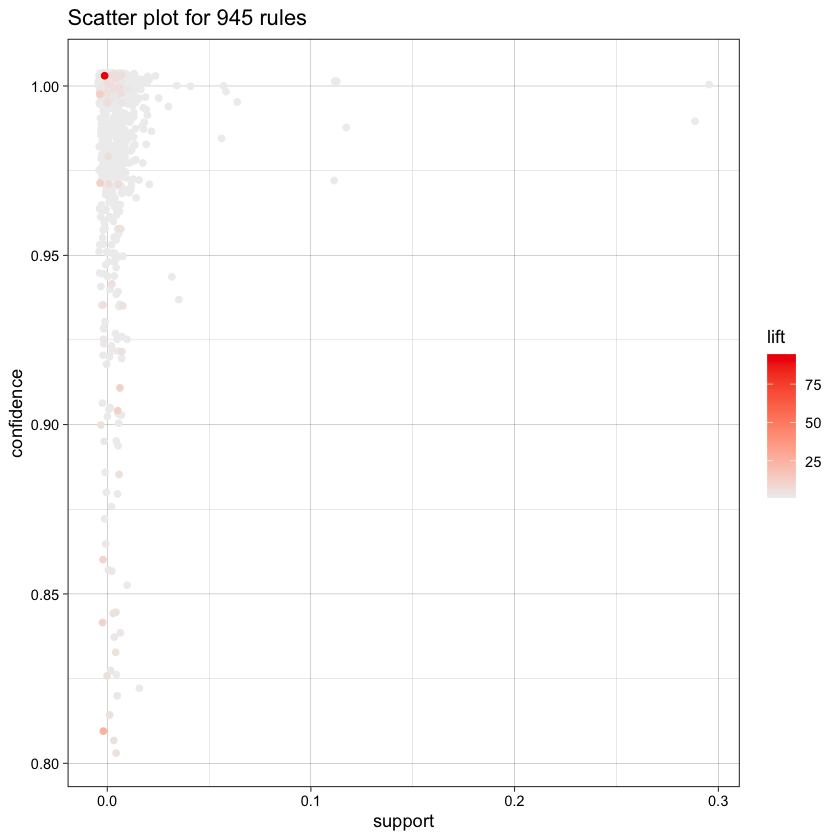

In [75]:
# Plot rules
plot(subset.rules1)

As mentioned earlier, plotting the rules above shows one rule in particular with very high lift, which is the JetBlue/Boston rule. The majority of our rules have less than 0.05 support but tend to have more than 0.95 confidence. The rule with the lift of 94 skews the color scales so it makes the other rules appear to have significantly lower lift, but the majority were still above 1.

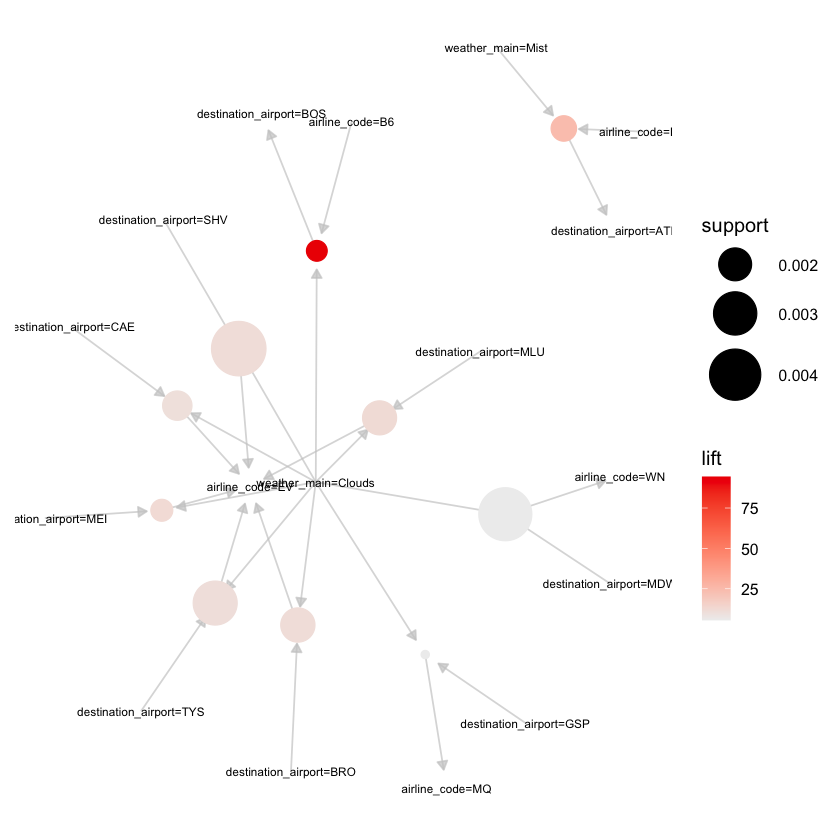

In [76]:
# plot(head(subset.rules1, n = 10, by = "lift"), method = "graph")

plot(head(subset.rules1, n = 10, by = "lift"), method = "graph", 
  control = list(
    nodetext = ggnetwork::geom_nodetext(aes(label = label), size = 2.5))) + 
  scale_size(range = c(2, 15)) 

Here, we take a graphical look at our top 10 rules by lift. This particular set of rules displays the connections between many airline codes and their hubs or frequent destinations, which tended to be the majority of our rules (such as JetBlue (B6) and Boston, Delta (DL) and Atlanta, and Southwest (WN) and Chicago Midway).

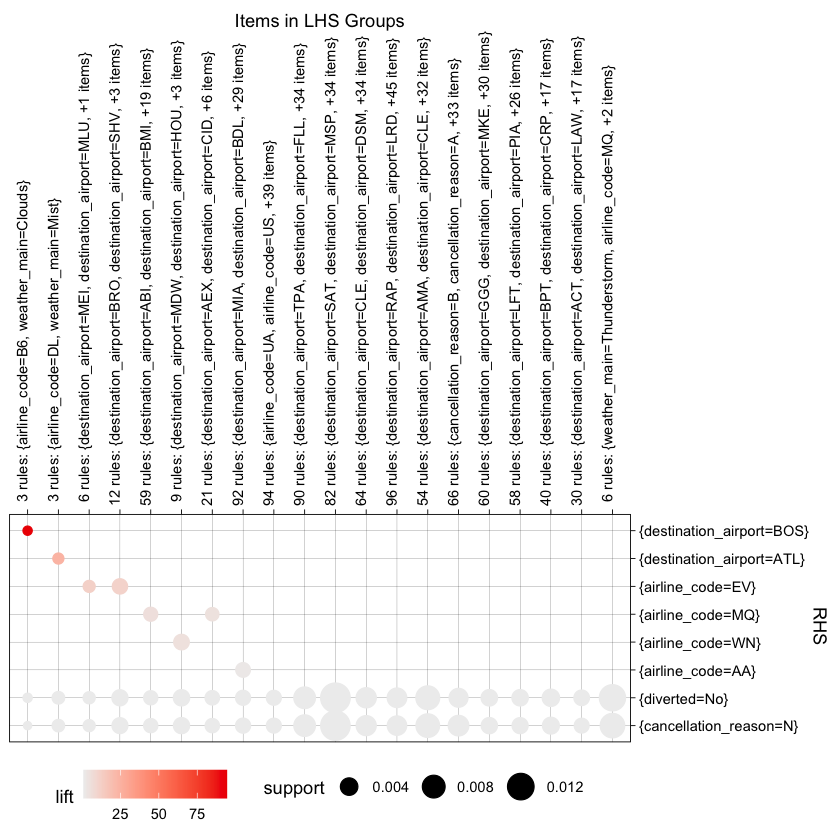

In [77]:
# Plot the sorted list of rules
plot(subset.rules1, method = "grouped")

In this plot, we see a lot of overlap in our itemsets for a right hand side value of {diverted = No} or {cancellation_reason = N}. This makes sense based on our understanding of the data, where the majority was `diverted = 'No'` and `cancellation_reason=N`. Boston and Atlanta as destination airports on the RHS have no overlap with more than one itemset.

### Cancelled = Yes on RHS

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


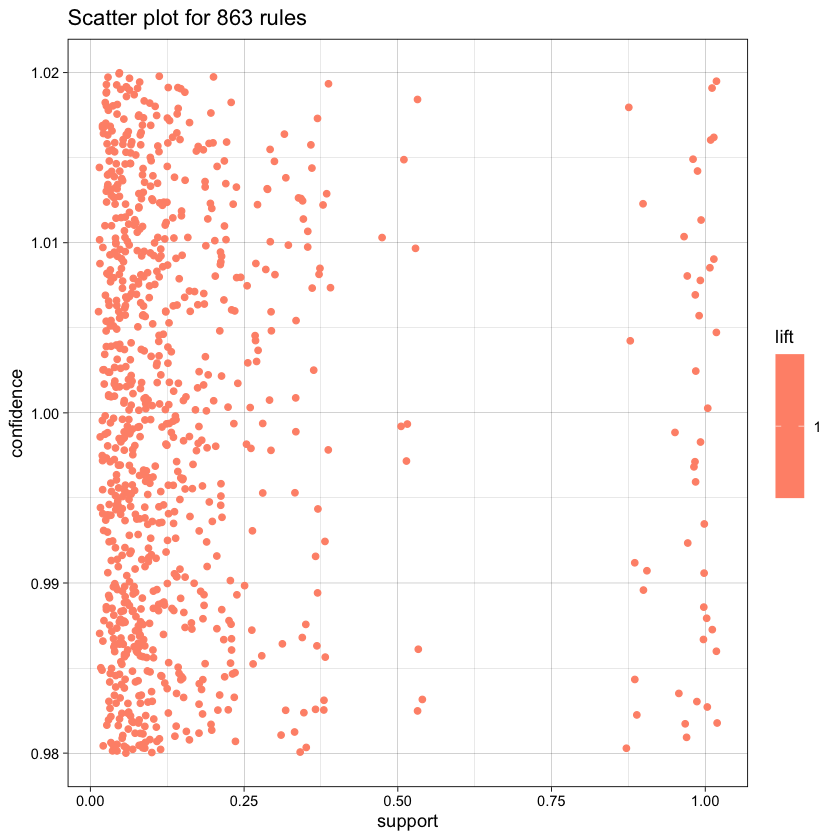

In [78]:
# Plot rules
plot(subset.rules3)

In visualizing our rules where {cancelled=YES} on the RHS, all of our rules have a lift of 1 which doesn't help in indentifying any significant rules. The points are fairly evenly spread across the entire range of confidence, but support has a few interesting features. Most of the points are clutered along the left-hand edge and spreading out over to around 0.35. There also appear to be two smaller bands of support clustered around 0.5 and 1.0. 

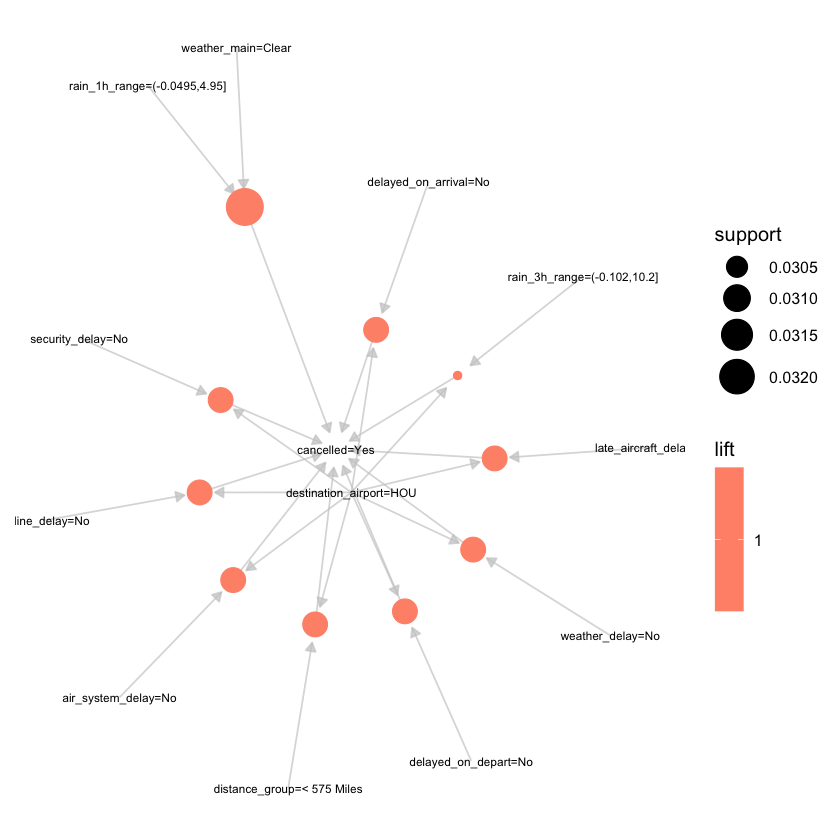

In [79]:
# Plot rules
# plot(head(subset.rules3, n = 10, by = "lift"), method = "graph")

plot(head(subset.rules3, n = 10, by = "lift"), method = "graph", 
  control = list(
    nodetext = ggnetwork::geom_nodetext(aes(label = label), size = 2.5))) + 
  scale_size(range = c(2, 10)) 

Here we see that Houston is at the center of our {cancelled=Yes} rules, but the items that populate the rules are primarily features where the value is "No". Overall, we're not sure this is a useful set of rules for this project. The main use of these rule sets is to reinforce the fact that Houston flights departing from the Dallas area rank pretty highly in terms of cancelled flights. This lines up with our prior visualization with Houston being the top destination airport in terms of cancelled flights.

## Delayed_on_departure on RHS

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


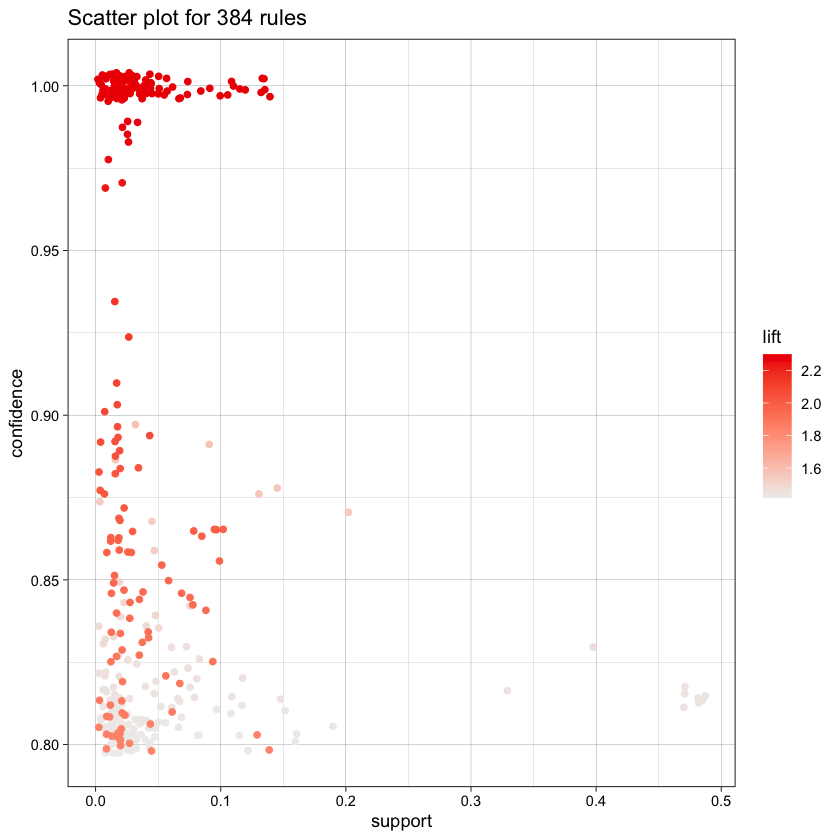

In [80]:
# Plot rules
plot(subset.rules6)

The visualization of this set of rules shows a clustering around confidence of 1, and rules with higher lift tending to have support less than 0.2. As discussed previously, even though this set of rules gave us good metrics - high lift values and confidence, decent support - we did not find them particularly useful since we had some sort of delay information on both the right and left hand sides. We removed this from the set of rules we ran when testing for arrival delays to find some more interesting rules.

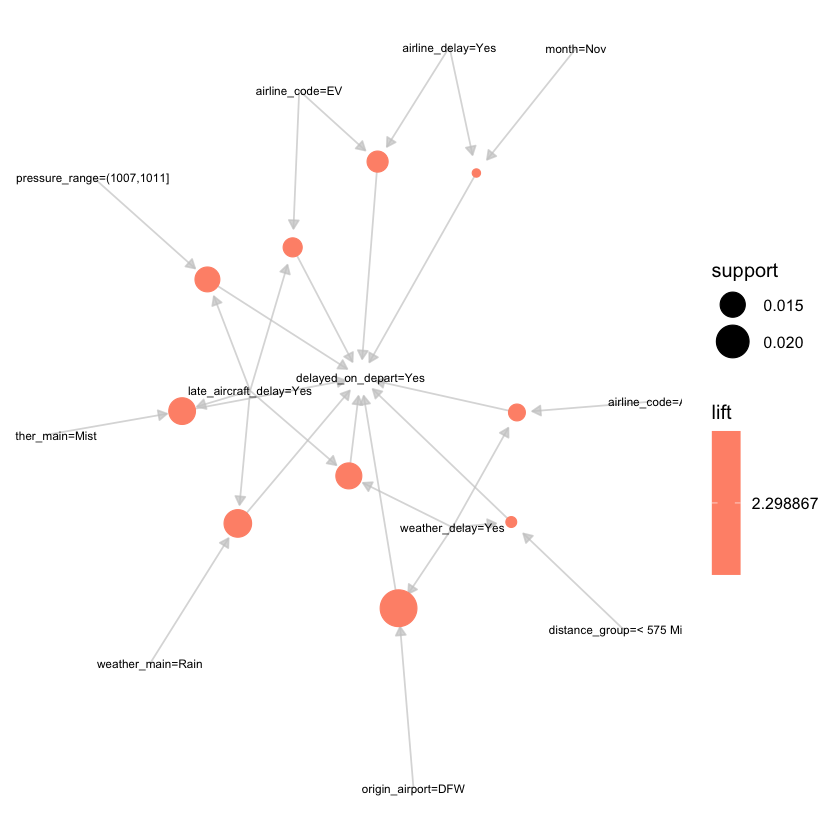

In [81]:
# plot(head(subset.rules6, n = 10, by = "lift"), method = "graph")

plot(head(subset.rules6, n = 10, by = "lift"), method = "graph", 
  control = list(
    nodetext = ggnetwork::geom_nodetext(aes(label = label), size = 2.5))) + 
  scale_size(range = c(2, 10)) 

We next visualized our top 10 rules by lift in a graphical way. The items that occur frequently that lead to delays on departure are if the origin airport is DFW instead of DAL, and other delay types such as late aircraft delays, weather delays, and airline delays. As mentioned previously, this set of rules did not appear to be particularly useful.

## Delayed_on_arrival on RHS

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


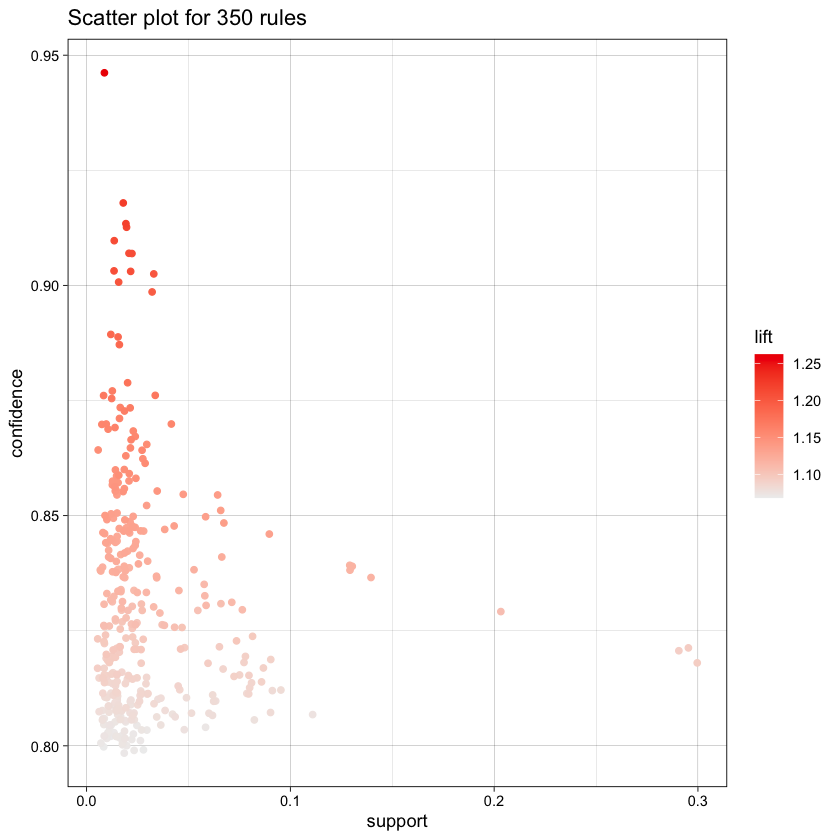

In [82]:
# Plot rules
plot(subset.rules9)

Above we plot our set of rules that we found to have the most useful insights. As noted previously, lift is low but still above 1 for all the rules. The other notable difference between this set of rules and prior sets is that our confidence level maxes out around 0.95 instead of going all the way up to 1 as we have seen before. Since we found this set to be the most interesting, and it has a bit lower confidence, for future analysis we may experiment more with a lower confidence value. 

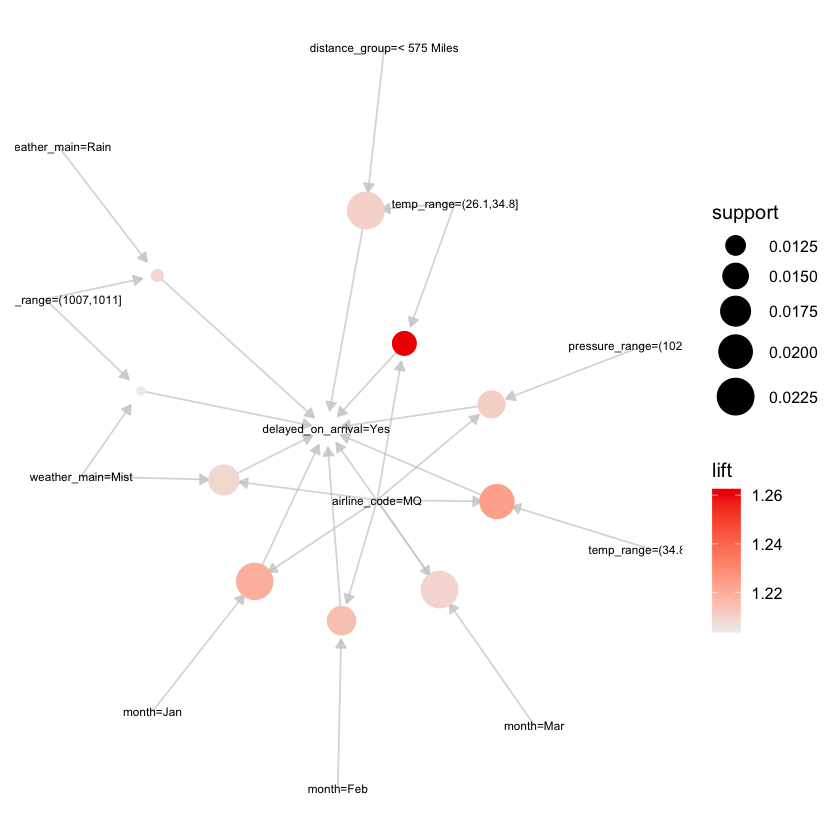

In [83]:
# plot(head(subset.rules9, n = 10, by = "lift"), method = "graph")

plot(head(subset.rules9, n = 10, by = "lift"), method = "graph", 
  control = list(
    nodetext = ggnetwork::geom_nodetext(aes(label = label), size = 2.5))) + 
  scale_size(range = c(2, 10)) 

Here we have a graphical visualization of our top 10 rules by lift for arrival delays. Winter months - January, February, and March - as well as temperature ranges in to 20's and 30's, tend to lead to arrival delays. This is a visual representation of what we saw before with Envoy/American Eagle and winter temperatures leading to arrival delays.

## Modeling and Evaluation 4
Jump to [top](#Rubric)

> Summarise the ramifications

While rule mining has been much less computationally expensive than other machine learning methods that we've explored, it has come with several downsides. In having to having all of the data be factors, nuance of continuous variables is lost - at least with our current clustering/bucketing process. In addition, with the data set that we currently have, it's unclear whether rule mining is the most useful tool for airlines and consumers. It is possible that with expanded information more useful rules might be found, but at this time we're not sure that rule mining is the best approach. 

The results that we have found can be used as a starting point for additional feature selection specifically for Envoy/American Eagle focusing on flights that depart from the Dallas area. We know that winter weather has a large impact on flight delays for this particular airline. If they can collect additional data regarding their flights, they could use this insight for additional modeling to perhaps quantify or predict arrival delays. Then, using this knowledge, determine areas of focus to reduce their arrival delays.

For future analysis, it is possible that spending more time creating factors and adjusting parameters like confidence instead of focusing so much on support and lift may have yielded more interesting rules. However, with the set of the data set we had, it may also be more use if we even further subset the data. 

# Deployment
Jump to [top](#Rubric)

**How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?**

This method helps create rules that will be useful for creating predictions and associations that would be useful to both consumers and airlines. The rule set that we believe would be most useful for the interested parties is our final set with `delayed_on_arrival` on the right hand side. This is because we found specific instances within this rule set that apply to specific airlines that could be a base for additional predictive modeling. Envoy/American Eagle could use some of these rules to determine best attributes to use in their own data analysis for determining risk factors leading to arrival delays. 
 
 
**How would your deploy your model for interested parties?**

The deployment of our model would be a combination of SQL server database and a Shiny app. The Shiny app allows for ease of use in exploring individual rules and certain parameters. This would be a open source product for the companies and consumers to use. Please see our Shiny app in the below section.
 
 
**What other data should be collected?**

Additional data that could be collected include additional weather details, holidays, and events that could possibly affect flights. Other useful information to include would be seasonal trends (flu season for example) and other international events that impact travel (such as COVID-19). Additionally, more data needs collected over more years as the data we used was collected in 2015 only.
 
 
**How often would the model need to be updated, etc.?**

This model would be best to be updated daily; however, if resources are a limitation, this could be run weekly instead. The frequency of updating these rules is largely determined by how much data is collected in a day, which is directly related to how many flights occur in a day. If travel conditions change, as we have seen with COVID-19, it may dictate a change in how often to re-run the rule mining.

# Exceptional Work
Jump to [top](#Rubric)

For our exceptional work, we created a [Shiny app](https://matt-farrow.shinyapps.io/7331-lab3-shiny/) inspired by the work that Xavier Duran Albareda did to "explore association rule mining within a medication and conditions dataset." [source](https://github.com/xdurana/medsnrules)

<img src="https://raw.githubusercontent.com/mattfarrow1/7331-machine-learning-1/main/Labs/Shiny_app_screenshot.png">

Additionally, we wanted to incorporate clustering into this lab. We found out our data set did not work well to do overall clustering, but we used it to guide us in creating our buckets for the individual features of `scheduled_departure`, `scheduled_arrival`, and `distance`. We thought this may aid in better grouping and therefore would help in showing up more often in our rules, but this did not turn out to be the case. 